In [1]:
import numpy as np
from get_data import get_raw, get_magnitudes
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter


## Initial Joint and Foot Data
We have been given the jointload and foot data for our experiment. There were three experiments in total which were F1, F2, and F3 which encompass Medium, Low and High force/pressure respecitvley. We need to analyse this data and clean it to make sure that our models function properly.

In [2]:
#Get all the magnitudes 
f1_foot_mag = get_magnitudes("Foot", "F1")
f1_jointload_mag = get_magnitudes("Jointload", "F1")
f2_foot_mag = get_magnitudes("Foot", "F2")
f2_jointload_mag = get_magnitudes("Jointload", "F2")
f3_foot_mag = get_magnitudes("Foot", "F3")
f3_jointload_mag = get_magnitudes("Jointload", "F3")

In [3]:
# Find Max and Mins
f1_foot_mag_min = min(f1_foot_mag)
f1_jointload_mag_min = min(f1_jointload_mag)
f1_foot_mag_max = max(f1_foot_mag)
f1_jointload_mag_max = max(f1_jointload_mag)

f2_foot_mag_min = min(f2_foot_mag)
f2_jointload_mag_min = min(f2_jointload_mag)
f2_foot_mag_max = max(f2_foot_mag)
f2_jointload_mag_max = max(f2_jointload_mag)

f3_foot_mag_min = min(f3_foot_mag)
f3_jointload_mag_min = min(f3_jointload_mag)
f3_foot_mag_max = max(f3_foot_mag)
f3_jointload_mag_max = max(f3_jointload_mag)
print("F1, Foot -  Min: " + str(f1_foot_mag_min) + " Max: " + str(f1_foot_mag_max))
print("F1, Jointload -  Min: " + str(f1_jointload_mag_min) + " Max: " + str(f1_jointload_mag_max))
print("F2, Foot -  Min: " + str(f2_foot_mag_min) + " Max: " + str(f2_foot_mag_max))
print("F2, Jointload -  Min: " + str(f2_jointload_mag_min) + " Max: " + str(f2_jointload_mag_max))
print("F3, Foot -  Min: " + str(f3_foot_mag_min) + " Max: " + str(f3_foot_mag_max))
print("F3, Jointload -  Min: " + str(f3_jointload_mag_min) + " Max: " + str(f3_jointload_mag_max))

F1, Foot -  Min: 0.30438894 Max: 0.3518496
F1, Jointload -  Min: 0.14192402 Max: 0.45049453
F2, Foot -  Min: 0.14781466 Max: 0.16203761
F2, Jointload -  Min: 0.029910922 Max: 0.07111466
F3, Foot -  Min: 0.00711146 Max: 0.58259064
F3, Jointload -  Min: 0.010835052 Max: 0.35206318


In [4]:
# Get spreads for histograms
number_of_ranges = 500

f1_foot_range = np.linspace(f1_foot_mag_min, f1_foot_mag_max, number_of_ranges)
f1_jointload_range = np.linspace(f1_jointload_mag_min, f1_jointload_mag_max, number_of_ranges)
f2_foot_range = np.linspace(f2_foot_mag_min, f2_foot_mag_max, number_of_ranges)
f2_jointload_range = np.linspace(f2_jointload_mag_min, f2_jointload_mag_max, number_of_ranges)
f3_foot_range = np.linspace(f3_foot_mag_min, f3_foot_mag_max, number_of_ranges)
f3_jointload_range = np.linspace(f3_jointload_mag_min, f3_jointload_mag_max, number_of_ranges)

<Figure size 640x480 with 0 Axes>

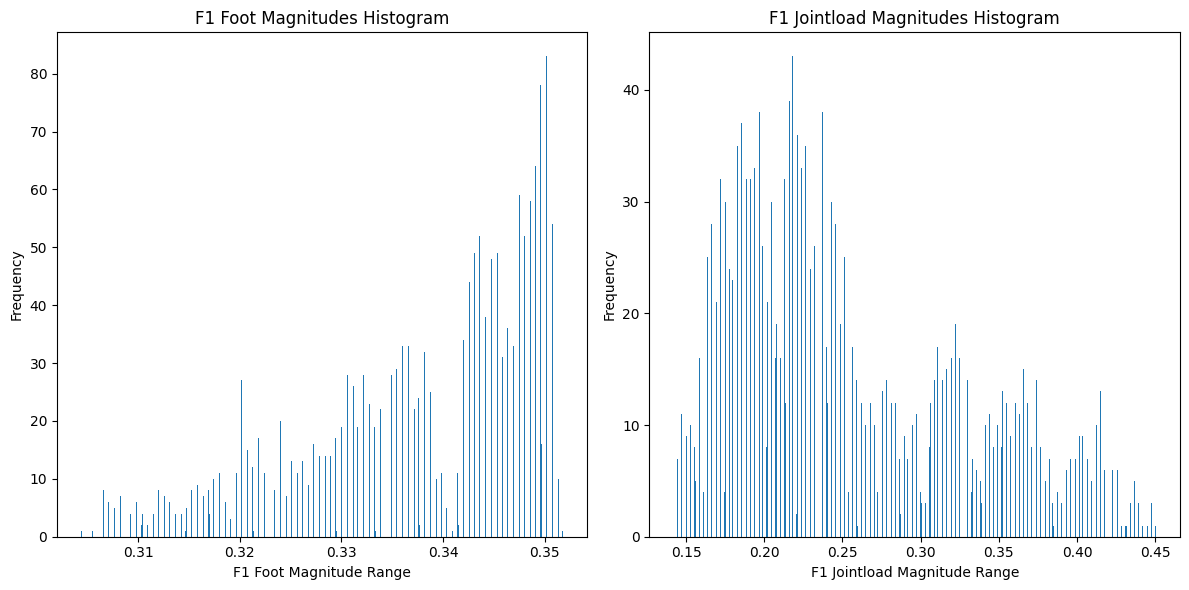

In [5]:
# Graph F1
plt.clf()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(f1_foot_mag, f1_foot_range)
axes[0].set_title("F1 Foot Magnitudes Histogram")
axes[0].set_xlabel("F1 Foot Magnitude Range")
axes[0].set_ylabel("Frequency")

axes[1].hist(f1_jointload_mag, f1_jointload_range)
axes[1].set_title("F1 Jointload Magnitudes Histogram")
axes[1].set_xlabel("F1 Jointload Magnitude Range")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

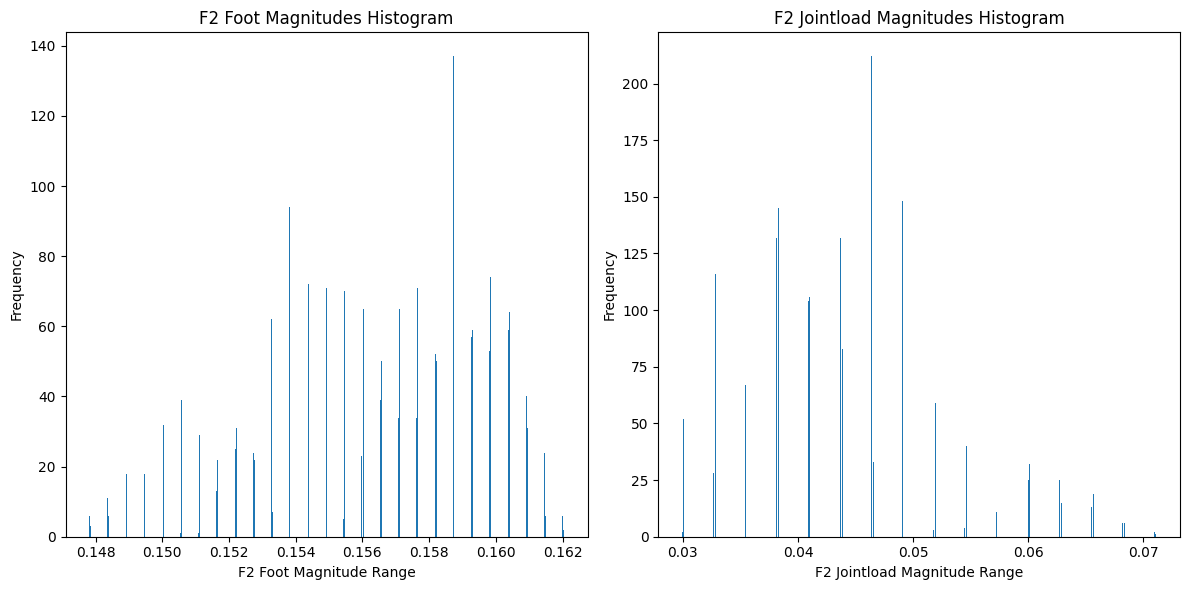

In [6]:
# Graph F2
plt.clf()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(f2_foot_mag, f2_foot_range)
axes[0].set_title("F2 Foot Magnitudes Histogram")
axes[0].set_xlabel("F2 Foot Magnitude Range")
axes[0].set_ylabel("Frequency")

axes[1].hist(f2_jointload_mag, f2_jointload_range)
axes[1].set_title("F2 Jointload Magnitudes Histogram")
axes[1].set_xlabel("F2 Jointload Magnitude Range")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

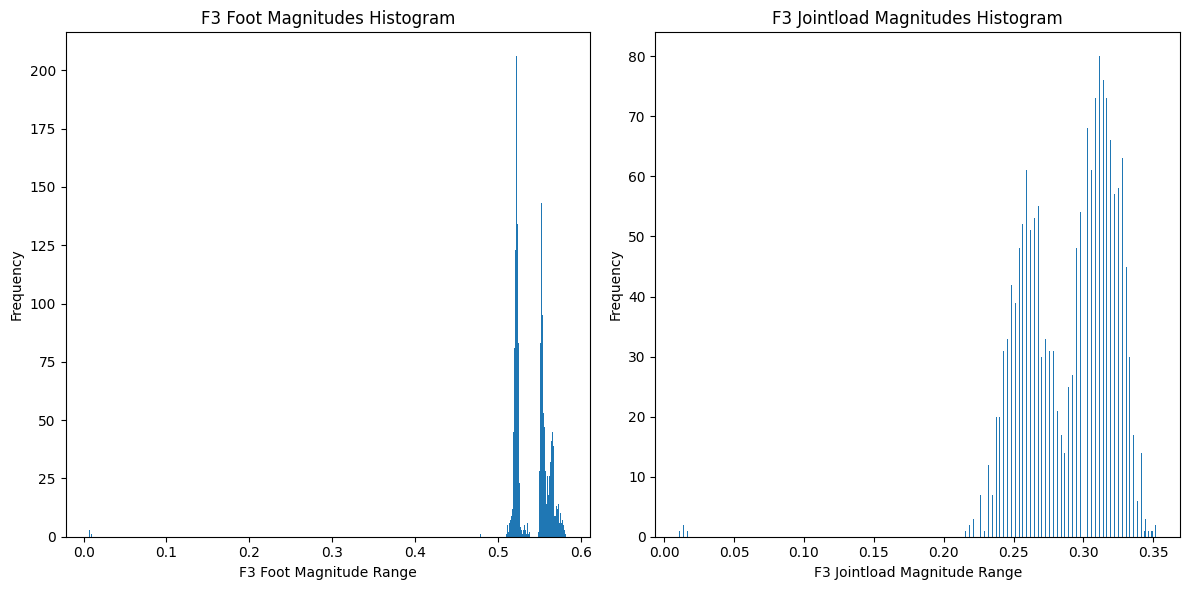

In [7]:
# Graph F3
plt.clf()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(f3_foot_mag, f3_foot_range)
axes[0].set_title("F3 Foot Magnitudes Histogram")
axes[0].set_xlabel("F3 Foot Magnitude Range")
axes[0].set_ylabel("Frequency")

axes[1].hist(f3_jointload_mag, f3_jointload_range)
axes[1].set_title("F3 Jointload Magnitudes Histogram")
axes[1].set_xlabel("F3 Jointload Magnitude Range")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Since we can see that our data has outliers we need to clean the data as well as chop off some of the F1 experiment since it seems that everything except for around the last 8 minutes is corrupted.

In [8]:
# Clean data with IQR

def remove_outliers(foot, jointload):
    #Get IQR for Foot
    Q1f, Q3f = np.percentile(foot, [25, 75])
    IQRf = Q3f - Q1f
    lowerf = Q1f - 1.5 * IQRf
    upperf = Q3f + 1.5 * IQRf

    #Get indexes where we want to clean
    foot_index = [n for n, i in enumerate(foot) if not((i >= lowerf) and (i <= upperf))]

    #Get IQR for Jointload
    Q1j, Q3j = np.percentile(jointload, [25, 75])
    IQRj = Q3j - Q1j
    lowerj = Q1j - 1.5 * IQRj
    upperj = Q3j + 1.5 * IQRj

    #Get indexes where we want to clean
    jointload_index = [n for n, i in enumerate(jointload) if not((i >= lowerj) and (i <= upperj))]

    #Combine the indexes without repeats
    combined_indexes = list(set(foot_index).union(set(jointload_index)))

    #Return cleaned data with all the indexes removed
    return [foot[i] for i in range(len(foot)) if i not in combined_indexes], [jointload[i] for i in range(len(jointload)) if i not in combined_indexes], combined_indexes

# First only take the last 8 minutes for the F1

f1_foot_mag = f1_foot_mag[-480:]
f1_jointload_mag = f1_jointload_mag[-480:]


f1_foot_mag_clean, f1_jointload_mag_clean, f1_cleaned_indexes = remove_outliers(f1_foot_mag, f1_jointload_mag)
f2_foot_mag_clean, f2_jointload_mag_clean, f2_cleaned_indexes = remove_outliers(f2_foot_mag, f2_jointload_mag)
f3_foot_mag_clean, f3_jointload_mag_clean, f3_cleaned_indexes = remove_outliers(f3_foot_mag, f3_jointload_mag)

#Remove last 2 of F3
f3_foot_mag_clean.pop(-1)
f3_jointload_mag_clean.pop(-1)
f3_foot_mag_clean.pop(-1)
f3_jointload_mag_clean.pop(-1)
f3_cleaned_indexes.append(1730)
f3_cleaned_indexes.append(1729)


print("New Lengths: \n")
print("F1 Foot: " + str(len(f1_foot_mag_clean)))
print("F1 Jointload: " + str(len(f1_jointload_mag_clean)))
print("F2 Foot: " + str(len(f2_foot_mag_clean)))
print("F2 Jointload: " + str(len(f2_jointload_mag_clean)))
print("F3 Foot: " + str(len(f3_foot_mag_clean)))
print("F3 Jointload: " + str(len(f3_jointload_mag_clean)))

New Lengths: 

F1 Foot: 480
F1 Jointload: 480
F2 Foot: 1766
F2 Jointload: 1766
F3 Foot: 1729
F3 Jointload: 1729


In [9]:
# Find Max and Mins
f1_foot_mag_min_clean = min(f1_foot_mag_clean)
f1_jointload_mag_min_clean = min(f1_jointload_mag_clean)
f1_foot_mag_max_clean = max(f1_foot_mag_clean)
f1_jointload_mag_max_clean = max(f1_jointload_mag_clean)

f2_foot_mag_min_clean = min(f2_foot_mag_clean)
f2_jointload_mag_min_clean = min(f2_jointload_mag_clean)
f2_foot_mag_max_clean = max(f2_foot_mag_clean)
f2_jointload_mag_max_clean = max(f2_jointload_mag_clean)

f3_foot_mag_min_clean = min(f3_foot_mag_clean)
f3_jointload_mag_min_clean = min(f3_jointload_mag_clean)
f3_foot_mag_max_clean = max(f3_foot_mag_clean)
f3_jointload_mag_max_clean = max(f3_jointload_mag_clean)
print("F1, Foot -  Min: " + str(f1_foot_mag_min_clean) + " Max: " + str(f1_foot_mag_max_clean))
print("F1, Jointload -  Min: " + str(f1_jointload_mag_min_clean) + " Max: " + str(f1_jointload_mag_max_clean))
print("F2, Foot -  Min: " + str(f2_foot_mag_min_clean) + " Max: " + str(f2_foot_mag_max_clean))
print("F2, Jointload -  Min: " + str(f2_jointload_mag_min_clean) + " Max: " + str(f2_jointload_mag_max_clean))
print("F3, Foot -  Min: " + str(f3_foot_mag_min_clean) + " Max: " + str(f3_foot_mag_max_clean))
print("F3, Jointload -  Min: " + str(f3_jointload_mag_min_clean) + " Max: " + str(f3_jointload_mag_max_clean))

F1, Foot -  Min: 0.34641677 Max: 0.3518496
F1, Jointload -  Min: 0.14482355 Max: 0.23470879
F2, Foot -  Min: 0.14781466 Max: 0.16203761
F2, Jointload -  Min: 0.029910922 Max: 0.06546819
F3, Foot -  Min: 0.5105909 Max: 0.58259064
F3, Jointload -  Min: 0.21563303 Max: 0.35206318


In [10]:
# Get spreads for histograms
number_of_ranges = 500

f1_foot_range_clean = np.linspace(f1_foot_mag_min_clean, f1_foot_mag_max_clean, number_of_ranges)
f1_jointload_range_clean = np.linspace(f1_jointload_mag_min_clean, f1_jointload_mag_max_clean, number_of_ranges)
f2_foot_range_clean = np.linspace(f2_foot_mag_min_clean, f2_foot_mag_max_clean, number_of_ranges)
f2_jointload_range_clean = np.linspace(f2_jointload_mag_min_clean, f2_jointload_mag_max_clean, number_of_ranges)
f3_foot_range_clean = np.linspace(f3_foot_mag_min_clean, f3_foot_mag_max_clean, number_of_ranges)
f3_jointload_range_clean = np.linspace(f3_jointload_mag_min_clean, f3_jointload_mag_max_clean, number_of_ranges)

<Figure size 640x480 with 0 Axes>

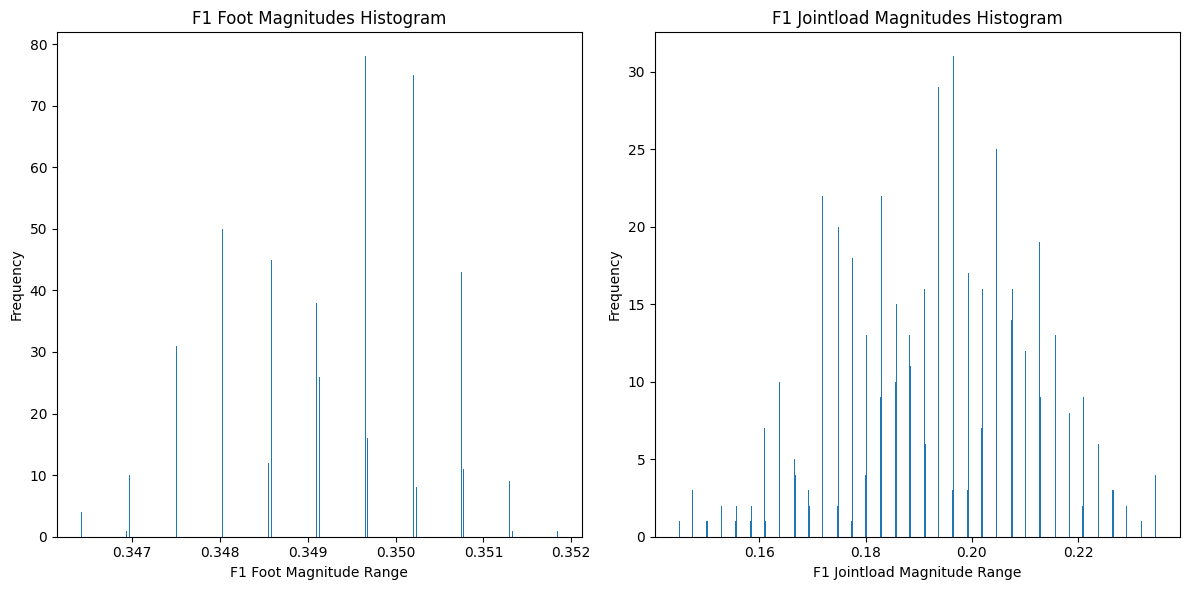

In [11]:
# Graph F1 Clean
plt.clf()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(f1_foot_mag_clean, f1_foot_range_clean)
axes[0].set_title("F1 Foot Magnitudes Histogram")
axes[0].set_xlabel("F1 Foot Magnitude Range")
axes[0].set_ylabel("Frequency")

axes[1].hist(f1_jointload_mag_clean, f1_jointload_range_clean)
axes[1].set_title("F1 Jointload Magnitudes Histogram")
axes[1].set_xlabel("F1 Jointload Magnitude Range")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

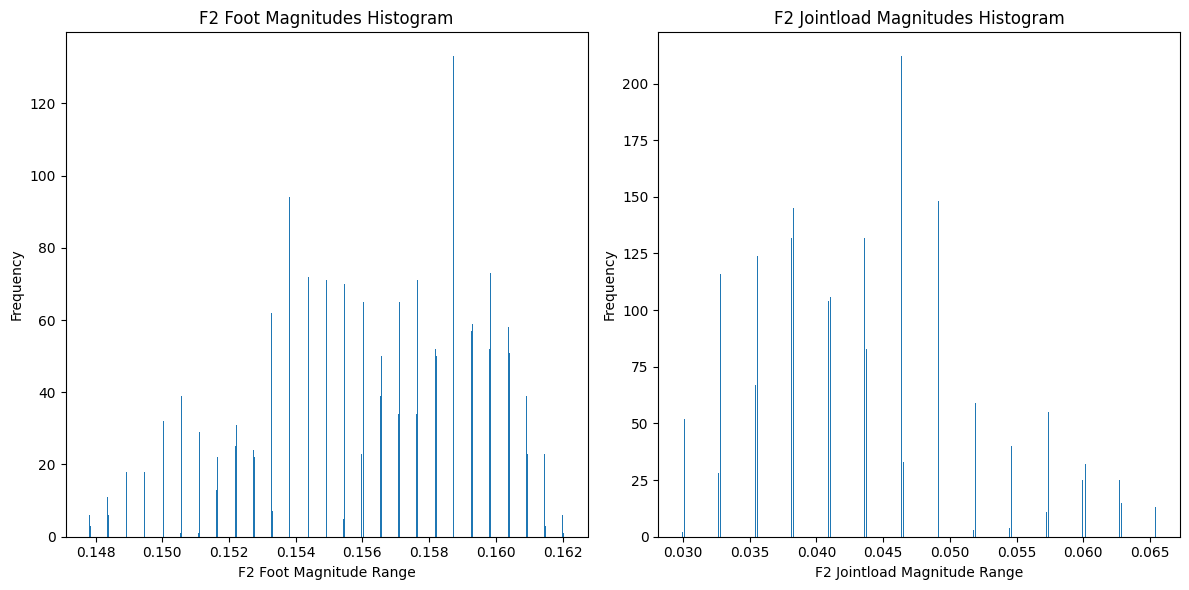

In [12]:
# Graph F2 Clean
plt.clf()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(f2_foot_mag_clean, f2_foot_range_clean)
axes[0].set_title("F2 Foot Magnitudes Histogram")
axes[0].set_xlabel("F2 Foot Magnitude Range")
axes[0].set_ylabel("Frequency")

axes[1].hist(f2_jointload_mag_clean, f2_jointload_range_clean)
axes[1].set_title("F2 Jointload Magnitudes Histogram")
axes[1].set_xlabel("F2 Jointload Magnitude Range")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

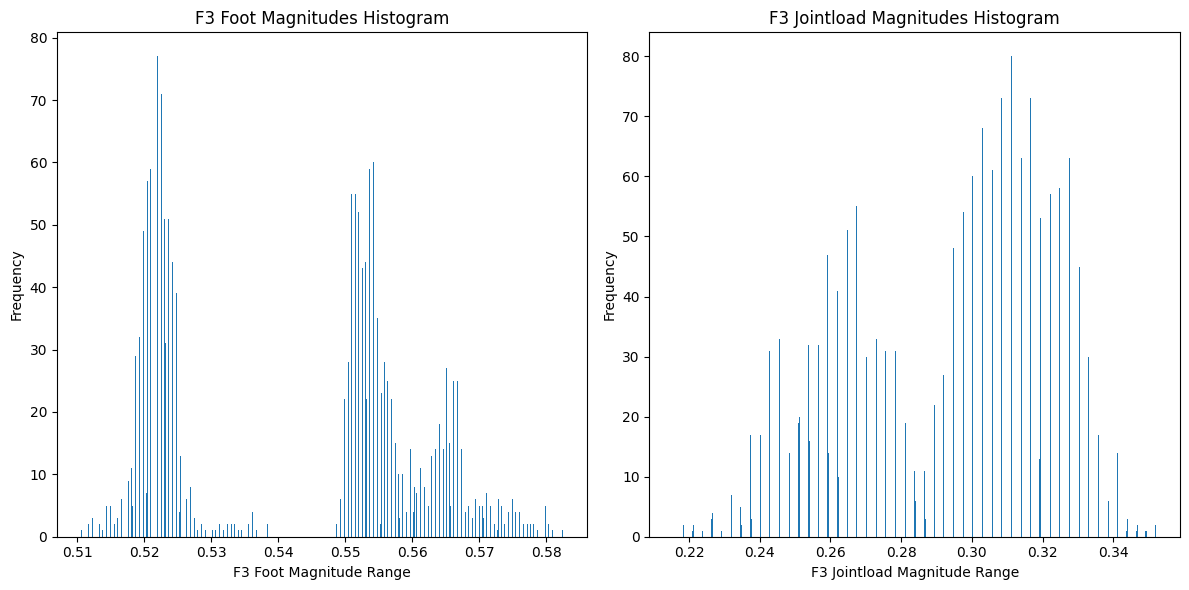

In [13]:
# Graph F3 Clean
plt.clf()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(f3_foot_mag_clean, f3_foot_range_clean)
axes[0].set_title("F3 Foot Magnitudes Histogram")
axes[0].set_xlabel("F3 Foot Magnitude Range")
axes[0].set_ylabel("Frequency")

axes[1].hist(f3_jointload_mag_clean, f3_jointload_range_clean)
axes[1].set_title("F3 Jointload Magnitudes Histogram")
axes[1].set_xlabel("F3 Jointload Magnitude Range")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## Looking at the force

We can now look at the conversion to force and pressure that will make looking at the data more intuitive rather than just looking at the magnitudes of the raw signals.

In [14]:
#Functions for conversion equation

def foot_conversion(magnitude):
    return [i / 112.41 * 1000 for i in magnitude]

def jointload_conversion(magnitude):
    return [(i * 1000 + 0.7367)/63.981 for i in magnitude]

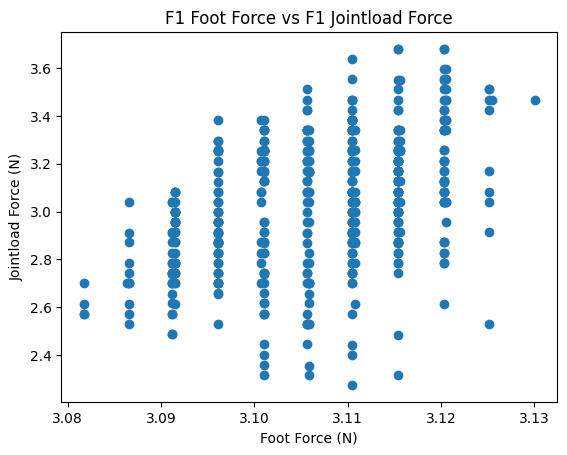

In [15]:
# Plot F1 conversions against each other
# Add colors later to make it better

plt.scatter(foot_conversion(f1_foot_mag_clean), jointload_conversion(f1_jointload_mag_clean))
plt.title("F1 Foot Force vs F1 Jointload Force")
plt.ylabel("Jointload Force (N)")
plt.xlabel("Foot Force (N)")
plt.show()

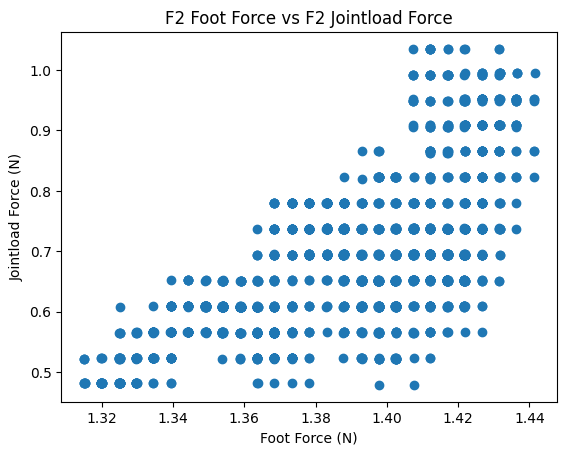

In [16]:
# Plot F2 conversions against each other

plt.scatter(foot_conversion(f2_foot_mag_clean), jointload_conversion(f2_jointload_mag_clean))
plt.title("F2 Foot Force vs F2 Jointload Force")
plt.ylabel("Jointload Force (N)")
plt.xlabel("Foot Force (N)")
plt.show()

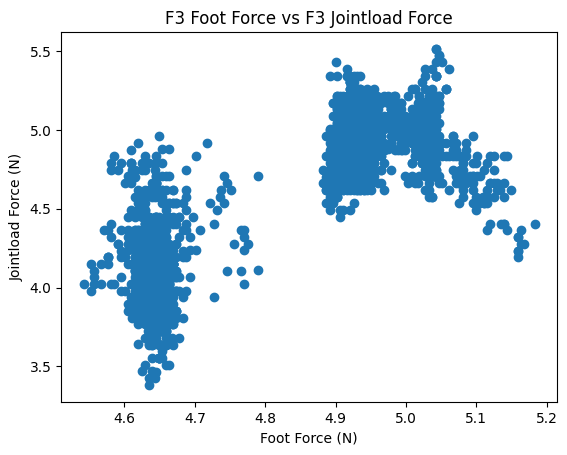

In [17]:
# Plot F3 conversions against each other

plt.scatter(foot_conversion(f3_foot_mag_clean), jointload_conversion(f3_jointload_mag_clean))
plt.title("F3 Foot Force vs F3 Jointload Force")
plt.ylabel("Jointload Force (N)")
plt.xlabel("Foot Force (N)")
plt.show()

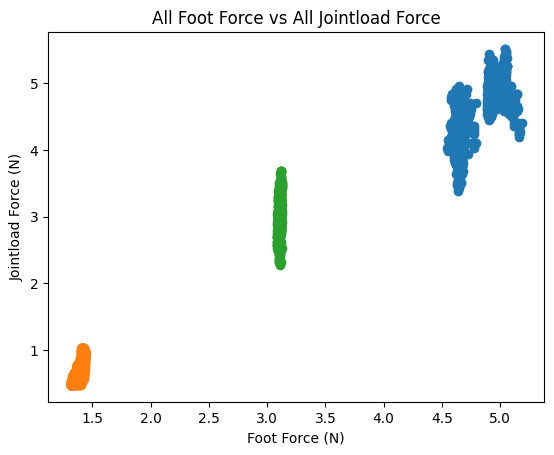

In [18]:
# Combined graph

plt.scatter(foot_conversion(f3_foot_mag_clean), jointload_conversion(f3_jointload_mag_clean))
plt.scatter(foot_conversion(f2_foot_mag_clean), jointload_conversion(f2_jointload_mag_clean))
plt.scatter(foot_conversion(f1_foot_mag_clean), jointload_conversion(f1_jointload_mag_clean))
plt.title("All Foot Force vs All Jointload Force")
plt.ylabel("Jointload Force (N)")
plt.xlabel("Foot Force (N)")
plt.show()

## Looking at the raw data

Now that we have analyzed the magnitude and the force conversion we can look at the raw data to see if we can explain some of the patterns that we have previously seen.

In [19]:
#Start looking at raw data

f1_foot_raw, f1_foot_size = get_raw("Foot", "F1")
f1_jointload_raw, f1_jointload_size = get_raw("Jointload", "F1")
f2_foot_raw, f2_foot_size = get_raw("Foot", "F2")
f2_jointload_raw, f2_jointload_size = get_raw("Jointload", "F2")
f3_foot_raw, f3_foot_size = get_raw("Foot", "F3")
f3_jointload_raw, f3_jointload_size = get_raw("Jointload", "F3")

In [20]:
#Remove unclean data from raw
f1_foot_raw_pre = [f1_foot_raw[i] for i in range(len(f1_foot_raw)) if i not in f1_cleaned_indexes]
f1_jointload_raw_pre = [f1_jointload_raw[i] for i in range(len(f1_jointload_raw)) if i not in f1_cleaned_indexes]
f2_foot_raw_clean = [f2_foot_raw[i] for i in range(len(f2_foot_raw)) if i not in f2_cleaned_indexes]
f2_jointload_raw_clean = [f2_jointload_raw[i] for i in range(len(f2_jointload_raw)) if i not in f2_cleaned_indexes]
f3_foot_raw_clean = [f3_foot_raw[i] for i in range(len(f3_foot_raw)) if i not in f3_cleaned_indexes]
f3_jointload_raw_clean = [f3_jointload_raw[i] for i in range(len(f3_jointload_raw)) if i not in f3_cleaned_indexes]

In [21]:
# Change F1 size
# Since I know the size of f1 I will hard code it. May need to change later
# F1 has all sizes of 100 except for last that has size of 99

f1_foot_raw_clean = f1_foot_raw_pre[-480:]
f1_jointload_raw_clean = f1_jointload_raw_pre[-480:]

In [22]:
# See new and old lengths
print("Lengths of Raw vs Clean")
print("F1 Foot Raw: " + str(len(f1_foot_raw)) + " F1 Foot Raw Cleaned: " + str(len(f1_foot_raw_clean)))
print("F1 Jointload Raw: " + str(len(f1_jointload_raw)) + " F1 Foot Raw Cleaned: " + str(len(f1_jointload_raw_clean)))
print("F2 Foot Raw: " + str(len(f2_foot_raw)) + " F2 Foot Raw Cleaned: " + str(len(f2_foot_raw_clean)))
print("F2 Jointload Raw: " + str(len(f2_jointload_raw)) + " F2 Foot Raw Cleaned: " + str(len(f2_jointload_raw_clean)))
print("F3 Foot Raw: " + str(len(f3_foot_raw)) + " F3 Foot Raw Cleaned: " + str(len(f3_foot_raw_clean)))
print("F3 Jointload Raw: " + str(len(f3_jointload_raw)) + " F3 Foot Raw Cleaned: " + str(len(f3_jointload_raw_clean)))

Lengths of Raw vs Clean
F1 Foot Raw: 1799 F1 Foot Raw Cleaned: 480
F1 Jointload Raw: 1799 F1 Foot Raw Cleaned: 480
F2 Foot Raw: 1800 F2 Foot Raw Cleaned: 1766
F2 Jointload Raw: 1800 F2 Foot Raw Cleaned: 1766
F3 Foot Raw: 1735 F3 Foot Raw Cleaned: 1729
F3 Jointload Raw: 1735 F3 Foot Raw Cleaned: 1729


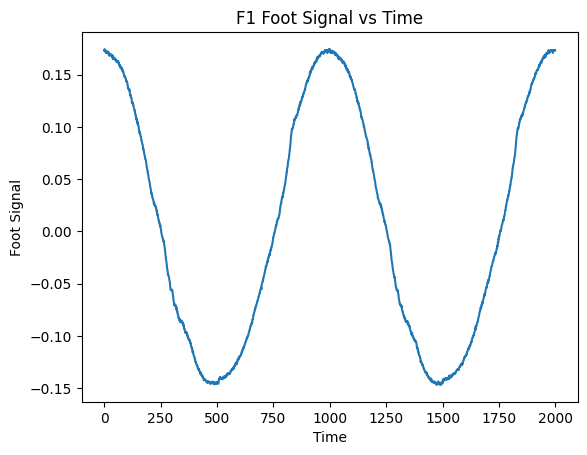

In [23]:
plt.plot(np.arange(0, 2000), np.concatenate((f1_foot_raw[198],   f1_foot_raw[199])))
plt.title("F1 Foot Signal vs Time")
plt.ylabel("Foot Signal")
plt.xlabel("Time")
plt.show()

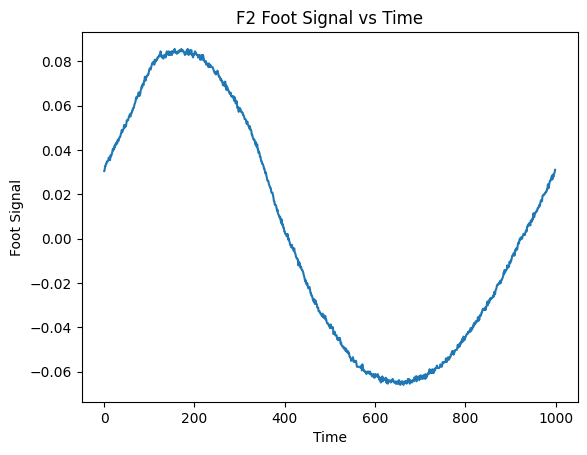

In [24]:
plt.plot(np.arange(0, 1000), f2_foot_raw_clean[230])
plt.title("F2 Foot Signal vs Time")
plt.ylabel("Foot Signal")
plt.xlabel("Time")
plt.show()

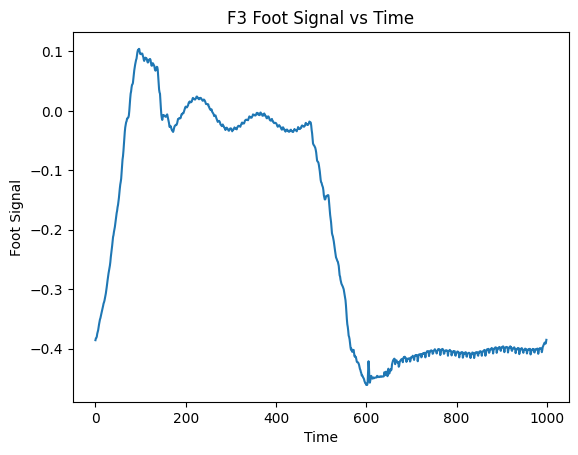

In [25]:
plt.plot(np.arange(0, 1000), f3_foot_raw_clean[100])
plt.title("F3 Foot Signal vs Time")
plt.ylabel("Foot Signal")
plt.xlabel("Time")
plt.show()

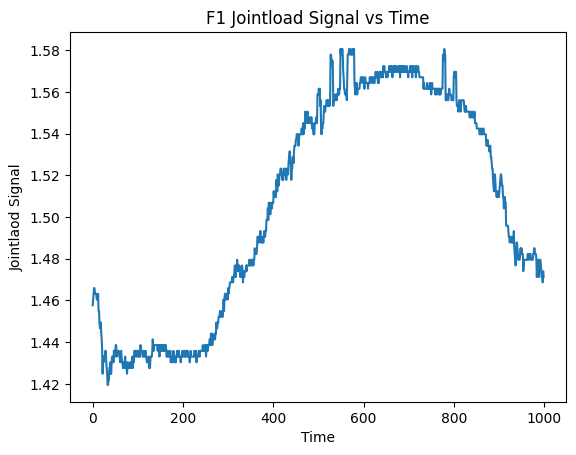

In [26]:
plt.plot(np.arange(0, 1000), f1_jointload_raw_clean[0])
plt.title("F1 Jointload Signal vs Time")
plt.ylabel("Jointlaod Signal")
plt.xlabel("Time")
plt.show()

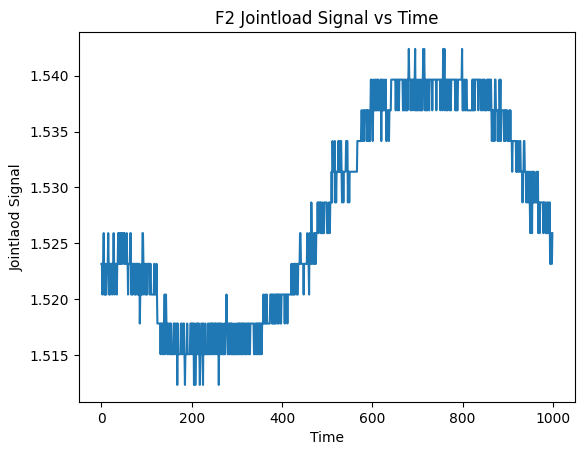

In [27]:
plt.plot(np.arange(0, 1000), f2_jointload_raw_clean[0])
plt.title("F2 Jointload Signal vs Time")
plt.ylabel("Jointlaod Signal")
plt.xlabel("Time")
plt.show()

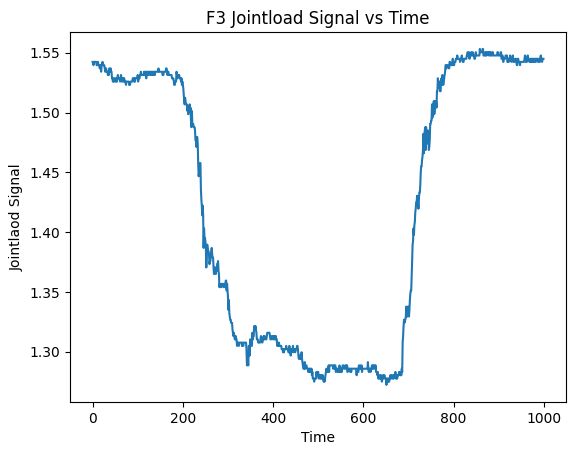

In [28]:
plt.plot(np.arange(0, 1000), f3_jointload_raw_clean[0])
plt.title("F3 Jointload Signal vs Time")
plt.ylabel("Jointlaod Signal")
plt.xlabel("Time")
plt.show()

## Smoothing data
Due to the shape of the raw data we may want to look at smoothing the data out to make it more usuable, or to make it so that even if these mistakes happen again we can make all the data look similar.

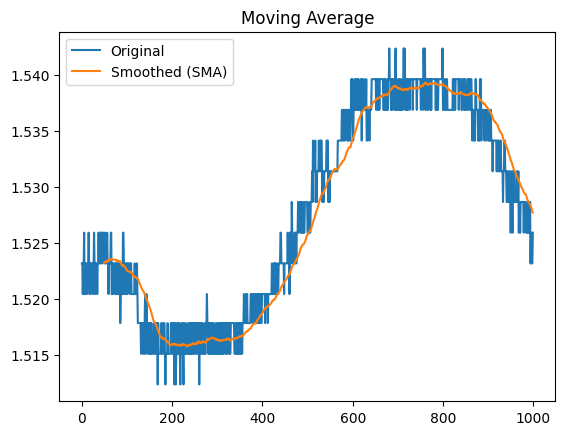

In [29]:
#Attempt to smooth raw data using moving average

ts = pd.Series(f2_jointload_raw_clean[0])
smooth_ts = ts.rolling(window=50).mean()
plt.plot(ts, label='Original')
plt.plot(smooth_ts, label='Smoothed (SMA)')
plt.title('Moving Average')
plt.legend()
plt.show()

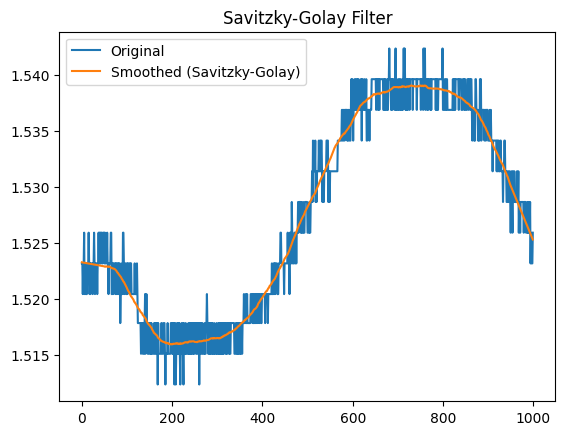

In [30]:
# Attempt at smoothing data using Savtizky-Golay Filter
smooth_ts = savgol_filter(f2_jointload_raw_clean[0], window_length=101, polyorder=1)

plt.plot(f2_jointload_raw_clean[0], label='Original')
plt.plot(smooth_ts, label='Smoothed (Savitzky-Golay)')
plt.title('Savitzky-Golay Filter')
plt.legend()
plt.show()

In [31]:
# Savtisky-Golay Filter looks a tad better so use that

window_size = 25
poly = 2

f1_foot_raw_smooth = [savgol_filter(i, window_length=window_size, polyorder=poly) for i in f1_foot_raw_clean]
f1_jointload_raw_smooth = [savgol_filter(i, window_length=window_size, polyorder=poly) for i in f1_jointload_raw_clean]
f2_foot_raw_smooth = [savgol_filter(i, window_length=window_size, polyorder=poly) for i in f2_foot_raw_clean]
f2_jointload_raw_smooth = [savgol_filter(i, window_length=window_size, polyorder=poly) for i in f2_jointload_raw_clean]
f3_foot_raw_smooth = [savgol_filter(i, window_length=window_size, polyorder=poly) for i in f3_foot_raw_clean]
f3_jointload_raw_smooth = [savgol_filter(i, window_length=window_size, polyorder=poly) for i in f3_jointload_raw_clean]

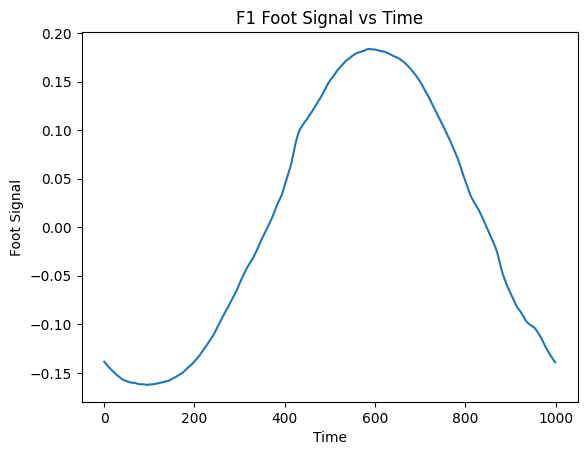

In [32]:
# Graph smoothed F1

plt.plot(np.arange(0, 1000), f1_foot_raw_smooth[0])
plt.title("F1 Foot Signal vs Time")
plt.ylabel("Foot Signal")
plt.xlabel("Time")
plt.show()

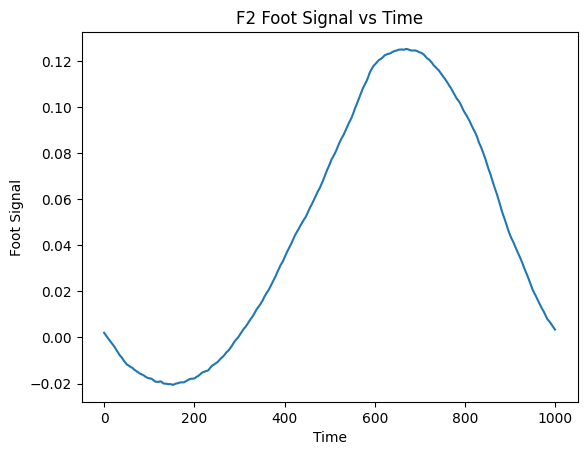

In [33]:
plt.plot(np.arange(0, 1000), f2_foot_raw_smooth[0])
plt.title("F2 Foot Signal vs Time")
plt.ylabel("Foot Signal")
plt.xlabel("Time")
plt.show()

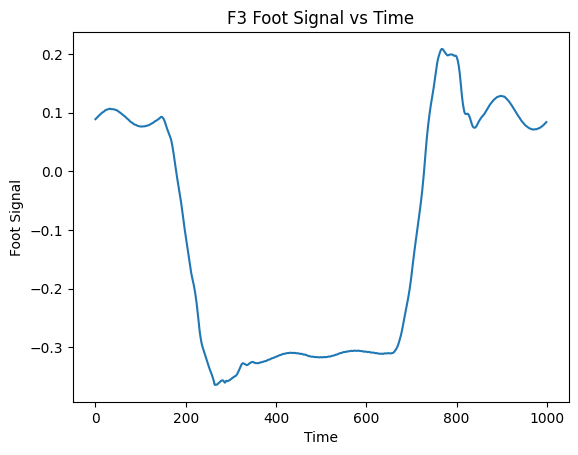

In [34]:
plt.plot(np.arange(0, 1000), f3_foot_raw_smooth[0])
plt.title("F3 Foot Signal vs Time")
plt.ylabel("Foot Signal")
plt.xlabel("Time")
plt.show()

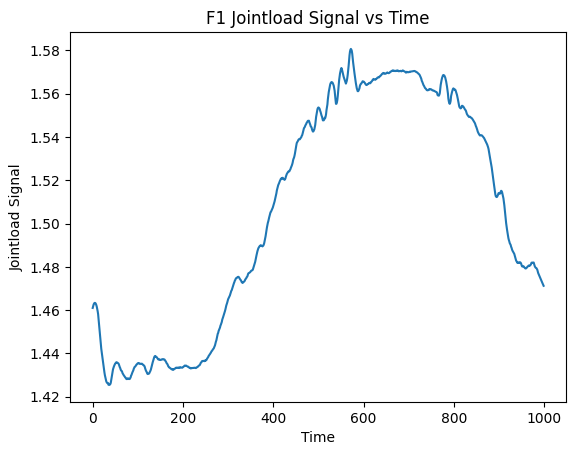

In [35]:
plt.plot(np.arange(0, 1000), f1_jointload_raw_smooth[0])
plt.title("F1 Jointload Signal vs Time")
plt.ylabel("Jointload Signal")
plt.xlabel("Time")
plt.show()

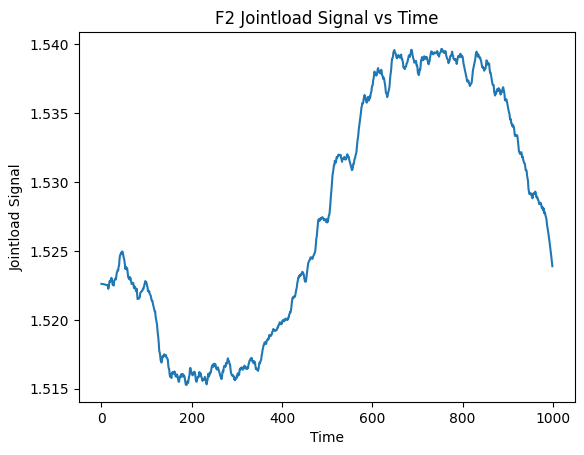

In [36]:
plt.plot(np.arange(0, 1000), f2_jointload_raw_smooth[0])
plt.title("F2 Jointload Signal vs Time")
plt.ylabel("Jointload Signal")
plt.xlabel("Time")
plt.show()

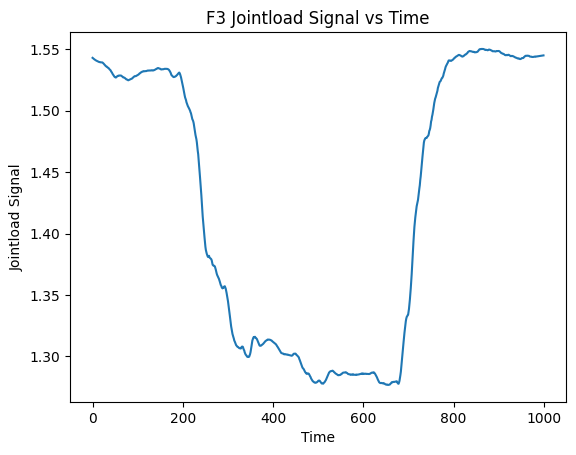

In [37]:
plt.plot(np.arange(0, 1000), f3_jointload_raw_smooth[0])
plt.title("F3 Jointload Signal vs Time")
plt.ylabel("Jointload Signal")
plt.xlabel("Time")
plt.show()

In [38]:
#Get all the magnitudes of smooth data
f1_foot_mag_smooth = get_magnitudes(None, None, f1_foot_raw_smooth)
f1_jointload_mag_smooth = get_magnitudes(None, None, f1_jointload_raw_smooth)
f2_foot_mag_smooth = get_magnitudes(None, None, f2_foot_raw_smooth)
f2_jointload_mag_smooth = get_magnitudes(None, None, f2_jointload_raw_smooth)
f3_foot_mag_smooth = get_magnitudes(None, None, f3_foot_raw_smooth)
f3_jointload_mag_smooth = get_magnitudes(None, None, f3_jointload_raw_smooth)

In [39]:
# Find Max and Mins
f1_foot_mag_min_smooth = min(f1_foot_mag_smooth)
f1_jointload_mag_min_smooth = min(f1_jointload_mag_smooth)
f1_foot_mag_max_smooth = max(f1_foot_mag_smooth)
f1_jointload_mag_max_smooth = max(f1_jointload_mag_smooth)

f2_foot_mag_min_smooth = min(f2_foot_mag_smooth)
f2_jointload_mag_min_smooth = min(f2_jointload_mag_smooth)
f2_foot_mag_max_smooth = max(f2_foot_mag_smooth)
f2_jointload_mag_max_smooth = max(f2_jointload_mag_smooth)

f3_foot_mag_min_smooth = min(f3_foot_mag_smooth)
f3_jointload_mag_min_smooth = min(f3_jointload_mag_smooth)
f3_foot_mag_max_smooth = max(f3_foot_mag_smooth)
f3_jointload_mag_max_smooth = max(f3_jointload_mag_smooth)
print("F1, Foot -  Min: " + str(f1_foot_mag_min_smooth) + " Max: " + str(f1_foot_mag_max_smooth))
print("F1, Jointload -  Min: " + str(f1_jointload_mag_min_smooth) + " Max: " + str(f1_jointload_mag_max_smooth))
print("F2, Foot -  Min: " + str(f2_foot_mag_min_smooth) + " Max: " + str(f2_foot_mag_max_smooth))
print("F2, Jointload -  Min: " + str(f2_jointload_mag_min_smooth) + " Max: " + str(f2_jointload_mag_max_smooth))
print("F3, Foot -  Min: " + str(f3_foot_mag_min_smooth) + " Max: " + str(f3_foot_mag_max_smooth))
print("F3, Jointload -  Min: " + str(f3_jointload_mag_min_smooth) + " Max: " + str(f3_jointload_mag_max_smooth))

F1, Foot -  Min: 0.34456313 Max: 0.3490042
F1, Jointload -  Min: 0.1355375 Max: 0.23192072
F2, Foot -  Min: 0.14557704 Max: 0.15946929
F2, Jointload -  Min: 0.024173617 Max: 0.06266904
F3, Foot -  Min: 0.5002247 Max: 0.57234216
F3, Jointload -  Min: 0.2052486 Max: 0.35087025


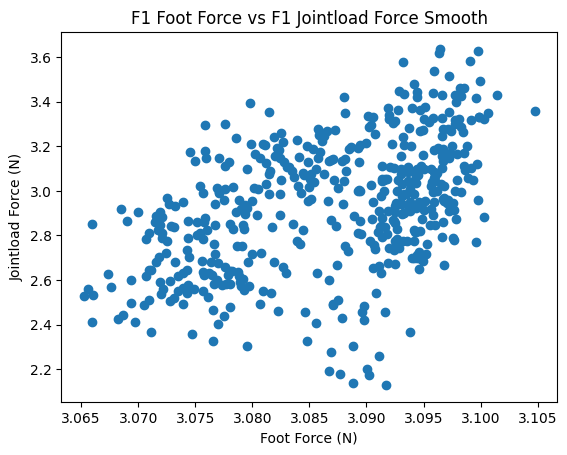

In [40]:
# Plot F1 conversions against each other
# Add colors later to make it better

plt.scatter(foot_conversion(f1_foot_mag_smooth), jointload_conversion(f1_jointload_mag_smooth))
plt.title("F1 Foot Force vs F1 Jointload Force Smooth")
plt.ylabel("Jointload Force (N)")
plt.xlabel("Foot Force (N)")
plt.show()

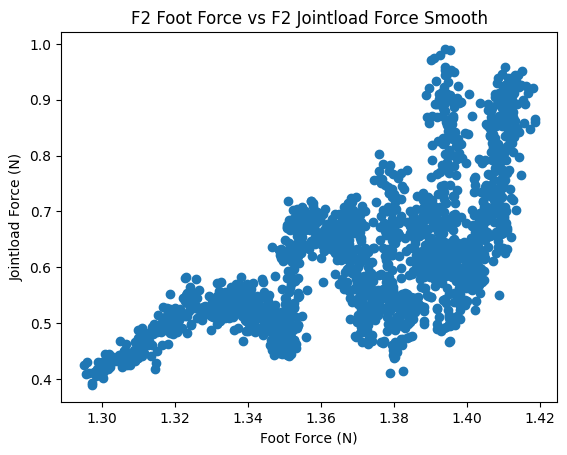

In [41]:
# Plot F2 conversions against each other

plt.scatter(foot_conversion(f2_foot_mag_smooth), jointload_conversion(f2_jointload_mag_smooth))
plt.title("F2 Foot Force vs F2 Jointload Force Smooth")
plt.ylabel("Jointload Force (N)")
plt.xlabel("Foot Force (N)")
plt.show()

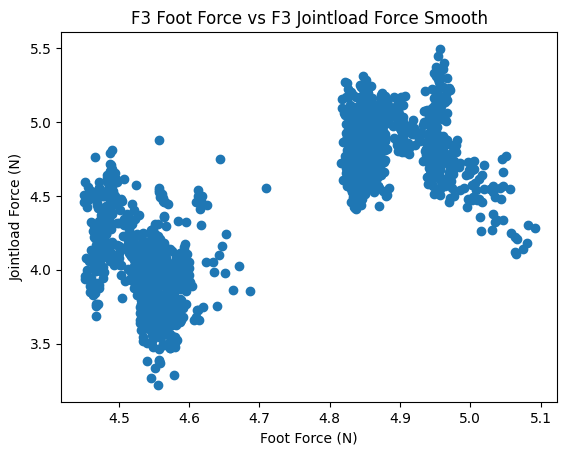

In [42]:
# Plot F3 conversions against each other

plt.scatter(foot_conversion(f3_foot_mag_smooth), jointload_conversion(f3_jointload_mag_smooth))
plt.title("F3 Foot Force vs F3 Jointload Force Smooth")
plt.ylabel("Jointload Force (N)")
plt.xlabel("Foot Force (N)")
plt.show()

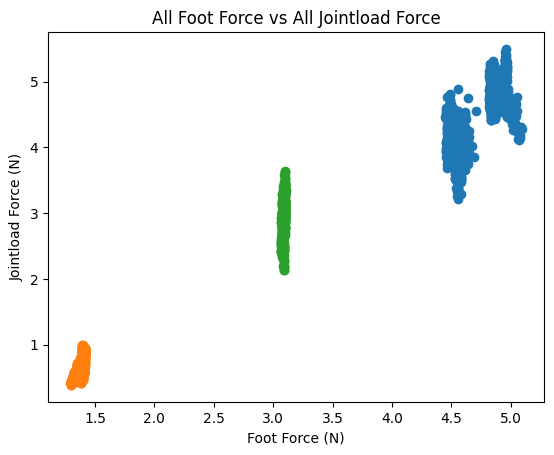

In [43]:
# Combined graph

plt.scatter(foot_conversion(f3_foot_mag_smooth), jointload_conversion(f3_jointload_mag_smooth))
plt.scatter(foot_conversion(f2_foot_mag_smooth), jointload_conversion(f2_jointload_mag_smooth))
plt.scatter(foot_conversion(f1_foot_mag_smooth), jointload_conversion(f1_jointload_mag_smooth))
plt.title("All Foot Force vs All Jointload Force")
plt.ylabel("Jointload Force (N)")
plt.xlabel("Foot Force (N)")
plt.show()

## Training Random Forest Regression

Now that we have the data all set we can train a simple random forest regression model on it to try and see how the model performs with only this data. We use the non-smoothed data here for now but this can be adjusted.

In [44]:
# Train simple regression to see how it works
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


#Set seed for replication
np.random.seed(978)

In [45]:
f1_features = np.hstack((np.reshape(f1_foot_mag_clean, (-1, 1)), np.reshape([min(i) for i in f1_foot_raw_clean], (-1, 1)), np.reshape([max(i) for i in f1_foot_raw_clean], (-1, 1))))
f2_features = np.hstack((np.reshape(f2_foot_mag_clean, (-1, 1)), np.reshape([min(i) for i in f2_foot_raw_clean], (-1, 1)), np.reshape([max(i) for i in f2_foot_raw_clean], (-1, 1))))
f3_features = np.hstack((np.reshape(f3_foot_mag_clean, (-1, 1)), np.reshape([min(i) for i in f3_foot_raw_clean], (-1, 1)), np.reshape([max(i) for i in f3_foot_raw_clean], (-1, 1))))
features = np.vstack((f1_features, f2_features, f3_features))
results = np.hstack((f1_jointload_mag_clean, f2_jointload_mag_clean, f3_jointload_mag_clean))
kf = KFold(n_splits = 5, shuffle = True, random_state=978)
model = RandomForestRegressor(n_estimators=100, random_state=0)
scores = cross_val_score(model, features, results, cv = kf, scoring='neg_mean_squared_error')
print(scores)

[-0.0001197  -0.00011383 -0.00013177 -0.00011889 -0.00013482]


In [46]:
# Choose second fold

model = RandomForestRegressor(n_estimators=100, random_state=0)
for count, (train_index, test_index) in enumerate(kf.split(features)):
    if count != 1:
        continue
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = results[train_index], results[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(mean_squared_error(y_test, y_pred))



0.00011383177243457702


Text(0, 0.5, 'Predicted Jointload Values')

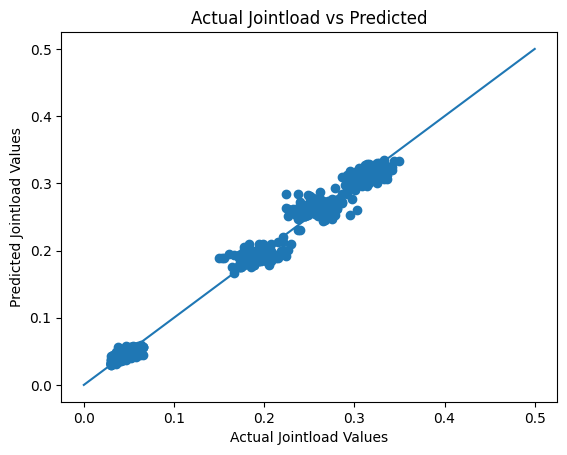

In [47]:
# Plot fit vs actual
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, .5, 100), np.linspace(0, .5, 100))
plt.title("Actual Jointload vs Predicted")
plt.xlabel("Actual Jointload Values")
plt.ylabel("Predicted Jointload Values")


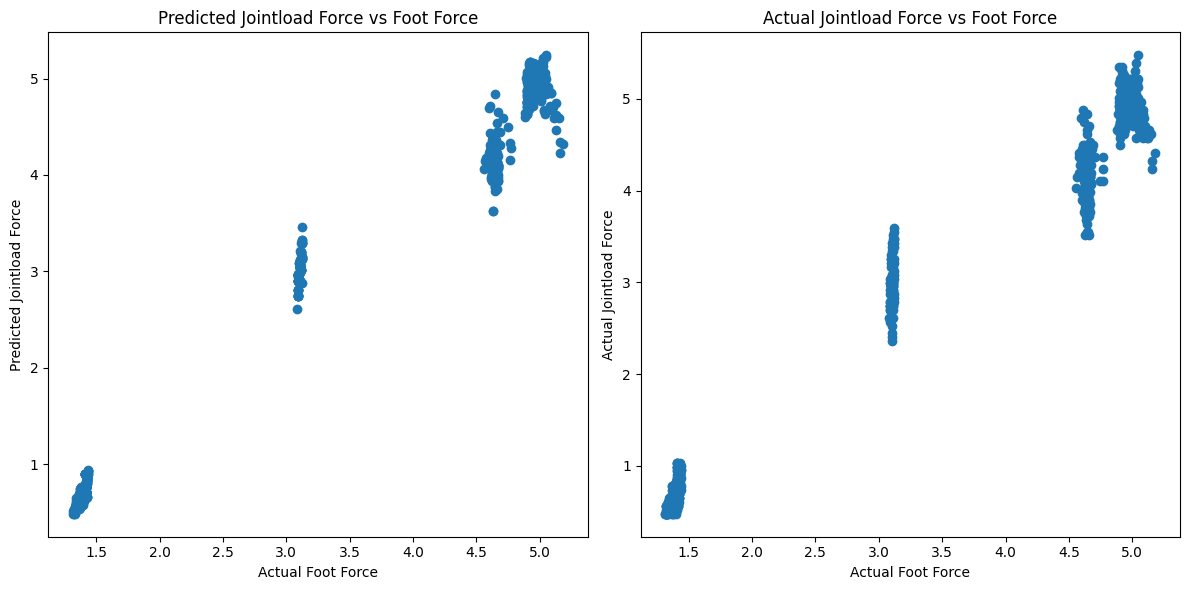

In [48]:
# Now we graph the force predictions against one another

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(foot_conversion(X_test[:,0]), jointload_conversion(y_pred))
axes[0].set_title("Predicted Jointload Force vs Foot Force")
axes[0].set_xlabel("Actual Foot Force")
axes[0].set_ylabel("Predicted Jointload Force")

axes[1].scatter(foot_conversion(X_test[:, 0]), jointload_conversion(y_test))
axes[1].set_title("Actual Jointload Force vs Foot Force")
axes[1].set_xlabel("Actual Foot Force")
axes[1].set_ylabel("Actual Jointload Force")

plt.tight_layout()
plt.show()

## Getting Knee Angle Data

The more data that we use the more accurate our model should become. So we will now use the .mov files that were provided in order to extract the angle data of the knee in order to get more data. We then need to match up this data to our previous data which should be easy since the previous data collection should start at time 0 of the video, even if the video goes on longer. So we just need to crop the data from the video and then match it with our other data.

In [50]:
#Read is csvs
#Due to some error we manually clean the csv data to make sure all the read csv is a float

f1_angle = pd.read_csv("./JointLoad Data/F1_Angle.csv", dtype=float, header = None).values.tolist()
f2_angle = pd.read_csv("./JointLoad Data/F2_Angle.csv", dtype = float, header = None).values.tolist()
f3_angle = pd.read_csv("./JointLoad Data/F3_Angle.csv", dtype = float, header = None).values.tolist()

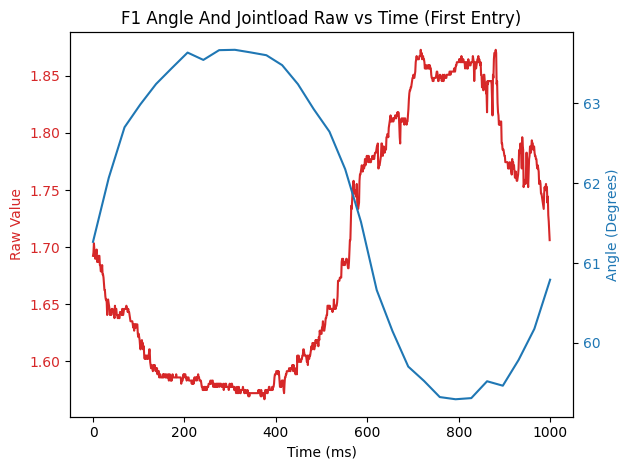

In [51]:
# Temporary
value = 0
fig, ax1 = plt.subplots()
ax1.set_title("F1 Angle And Jointload Raw vs Time (First Entry)")
color = 'tab:red'
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Raw Value', color=color)
ax1.plot(np.arange(0,1000), f1_jointload_raw[value], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Angle (Degrees)', color=color)  # we already handled the x-label with ax1
ax2.plot(np.linspace(0, 1000, 30), f1_angle[value], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [52]:
#Crop csvs to be the same size as other data

#Crop to original sizes
f1_angle_crop = f1_angle[:1799]
f2_angle_crop = f2_angle[:1800]
f3_angle_crop = f3_angle[:1735]

#Crop to last 8 minutes
f1_angle_crop = f1_angle_crop[-480:]

#Get rid of data corresponding to dirty data
f1_angle_crop = [f1_angle_crop[i] for i in range(len(f1_angle_crop)) if i not in f1_cleaned_indexes]
f2_angle_crop = [f2_angle_crop[i] for i in range(len(f2_angle_crop)) if i not in f2_cleaned_indexes]
f3_angle_crop = [f3_angle_crop[i] for i in range(len(f3_angle_crop)) if i not in f3_cleaned_indexes]

print("Length of F1 Angle: " + str(len(f1_angle_crop)))
print("Length of F2 Angle: " + str(len(f2_angle_crop)))
print("Length of F3 Angle: " + str(len(f3_angle_crop)))

Length of F1 Angle: 480
Length of F2 Angle: 1766
Length of F3 Angle: 1729


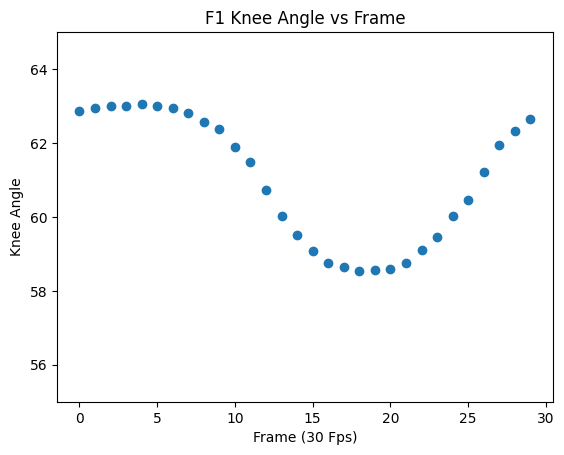

In [53]:
#Look at f1 raw data
plt.clf()

plt.scatter(np.arange(0, 30), f1_angle_crop[0])
plt.ylim(55, 65)
plt.title("F1 Knee Angle vs Frame")
plt.ylabel("Knee Angle")
plt.xlabel("Frame (30 Fps)")
plt.show()

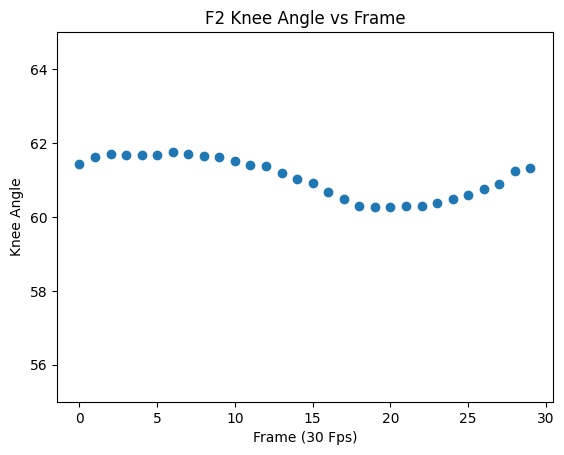

In [54]:
#Look at f2 raw data
plt.clf()

plt.scatter(np.arange(0, 30), f2_angle_crop[0])
plt.ylim(55, 65)
plt.title("F2 Knee Angle vs Frame")
plt.ylabel("Knee Angle")
plt.xlabel("Frame (30 Fps)")
plt.show()

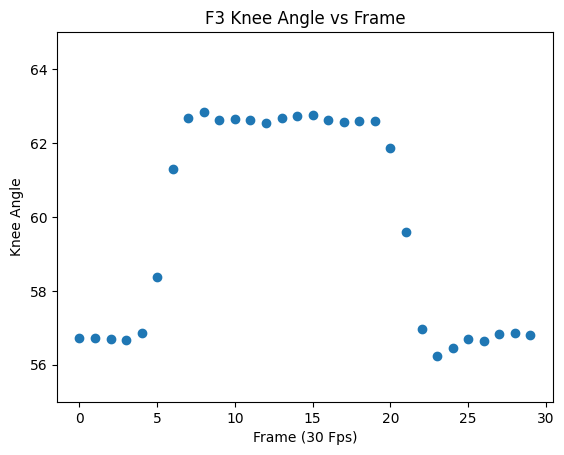

In [55]:
#Look at f3 raw data
plt.clf()

plt.scatter(np.arange(0, 30), f3_angle_crop[0])
plt.ylim(55, 65)
plt.title("F3 Knee Angle vs Frame")
plt.ylabel("Knee Angle")
plt.xlabel("Frame (30 Fps)")
plt.show()

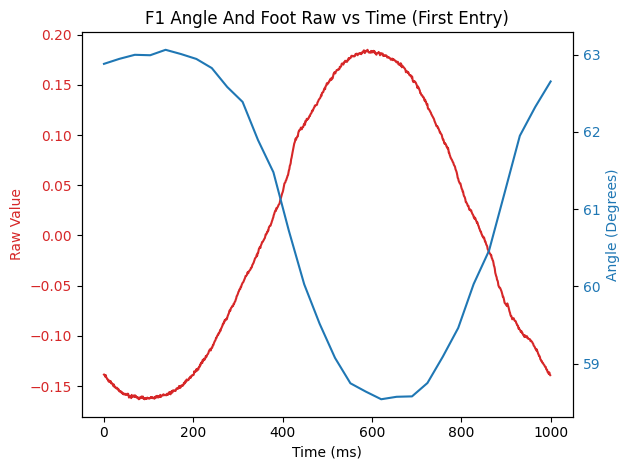

In [138]:
# Looking at the graphs in comparisson to the raw data
value = 0
fig, ax1 = plt.subplots()
ax1.set_title("F1 Angle And Foot Raw vs Time (First Entry)")
color = 'tab:red'
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Raw Value', color=color)
ax1.plot(np.arange(0,1000), f1_foot_raw_clean[value], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Angle (Degrees)', color=color)  # we already handled the x-label with ax1
ax2.plot(np.linspace(0, 1000, 30), f1_angle_crop[value], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

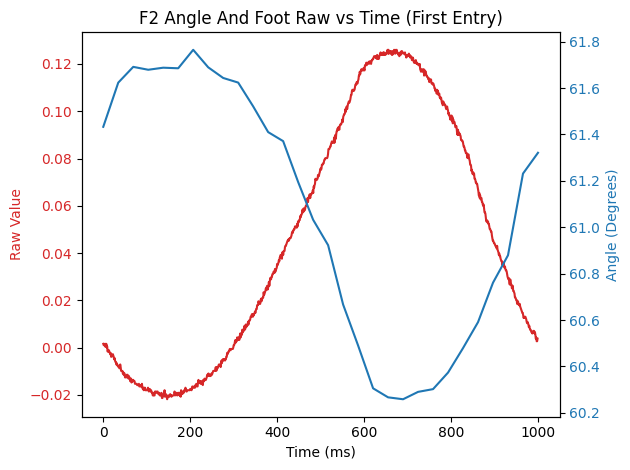

In [140]:
# Looking at the graphs in comparisson to the raw data
value = 0
fig, ax1 = plt.subplots()
ax1.set_title("F2 Angle And Foot Raw vs Time (First Entry)")
color = 'tab:red'
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Raw Value', color=color)
ax1.plot(np.arange(0,1000), f2_foot_raw_clean[value], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Angle (Degrees)', color=color)  # we already handled the x-label with ax1
ax2.plot(np.linspace(0, 1000, 30), f2_angle_crop[value], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

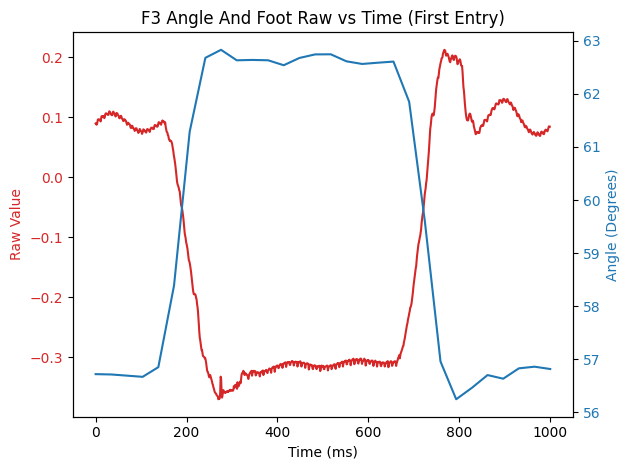

In [142]:
# Looking at the graphs in comparisson to the raw data
value = 0
fig, ax1 = plt.subplots()
ax1.set_title("F3 Angle And Foot Raw vs Time (First Entry)")
color = 'tab:red'
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Raw Value', color=color)
ax1.plot(np.arange(0,1000), f3_foot_raw_clean[value], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Angle (Degrees)', color=color)  # we already handled the x-label with ax1
ax2.plot(np.linspace(0, 1000, 30), f3_angle_crop[value], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Random Forest with Angle Data

In [59]:
# Create feautres for angle
angle_data = np.vstack((f1_angle_crop, f2_angle_crop, f3_angle_crop))
angle_autocorrelation = [pd.Series(i).autocorr(lag=1) for i in angle_data]
angle_max = np.max(angle_data, axis = 1)
angle_min = np.min(angle_data, axis = 1)
# frequency_spectrum = [np.fft.fft(i) for i in angle_data]

In [60]:
# Do a simple random forest with just raw angle data

angle_features= np.vstack((angle_autocorrelation, angle_max, angle_min)).transpose()
new_features = np.hstack((features, angle_features))
results = np.hstack((f1_jointload_mag_clean, f2_jointload_mag_clean, f3_jointload_mag_clean))
kf = KFold(n_splits = 5, shuffle = True, random_state=978)
angle_model = RandomForestRegressor(n_estimators=100, random_state=0)
scores = cross_val_score(angle_model, new_features, results, cv = kf, scoring='neg_mean_squared_error')
print(scores)

[-8.23058666e-05 -8.87083840e-05 -8.72689748e-05 -8.49293246e-05
 -8.42198242e-05]


In [61]:
#Choose fold 4

angle_model = RandomForestRegressor(n_estimators=100, random_state=0)
for count, (train_index, test_index) in enumerate(kf.split(new_features)):
    if count != 3:
        continue
    angle_X_train, angle_X_test = new_features[train_index], new_features[test_index]
    angle_y_train, angle_y_test = results[train_index], results[test_index]
    angle_model.fit(angle_X_train, angle_y_train)
    angle_y_pred = angle_model.predict(angle_X_test)
    print(mean_squared_error(angle_y_test, angle_y_pred))



8.492932460951924e-05


Text(0, 0.5, 'Predicted Jointload Values')

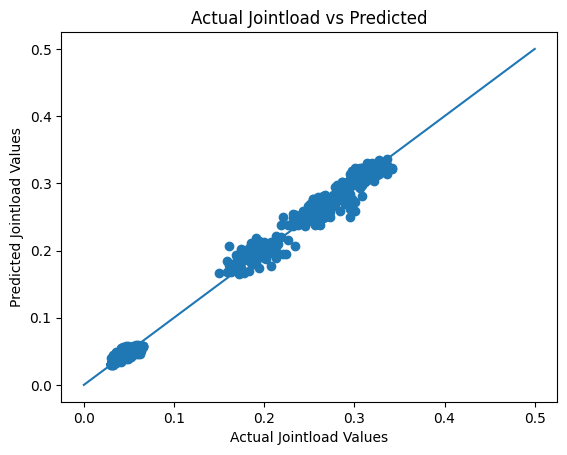

In [62]:
# Plot fit vs actual
plt.scatter(angle_y_test, angle_y_pred)
plt.plot(np.linspace(0, .5, 100), np.linspace(0, .5, 100))
plt.title("Actual Jointload vs Predicted")
plt.xlabel("Actual Jointload Values")
plt.ylabel("Predicted Jointload Values")


## Polynomial Regression
Just to try more types of regression we will try polynomial regression and see how it performs

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [64]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

pipeline.fit(angle_X_train, angle_y_train)

coef = pipeline.named_steps['linear'].coef_
intercept = pipeline.named_steps['linear'].intercept_

print("Intercept: " + str(intercept))
print("Coefficients: " + str(coef))
print(len(coef))

Intercept: -38.76218466765217
Coefficients: [ 2.38404331e+02  9.82581385e+06  9.82577946e+06 -9.82580246e+06
 -2.44675535e+02 -4.05487294e+00  1.37919677e+00  1.10812020e+06
  3.02710701e+05 -8.05568674e+05 -5.46087000e+05 -2.86903026e+05
  1.36694021e+05 -8.05408537e+05  1.10795975e+06 -5.46052840e+05
 -2.86902807e+05  1.36693811e+05 -3.02551966e+05  5.46061908e+05
  2.86903123e+05 -1.36693897e+05  2.56712242e+01  5.62351961e+00
 -2.46494823e+00 -1.49121881e-03 -1.97989959e-02  1.85535348e-02]
28


Text(0, 0.5, 'Predicted Polynomial Jointload Values')

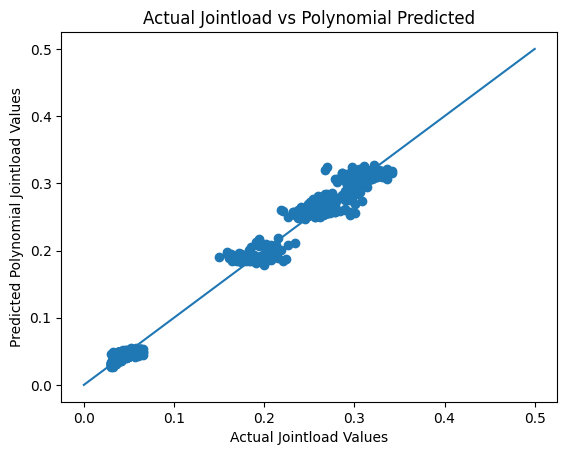

In [65]:
#Plot predicted vs actual
polynomial_results = pipeline.predict(angle_X_test)

plt.scatter(angle_y_test, polynomial_results)
# plt.ylim(0, .5)
plt.plot(np.linspace(0, .5, 100), np.linspace(0, .5, 100))
plt.title("Actual Jointload vs Polynomial Predicted")
plt.xlabel("Actual Jointload Values")
plt.ylabel("Predicted Polynomial Jointload Values")

## CNN

In [149]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError
from sklearn.model_selection import train_test_split
from functools import partial


In [67]:
# Stack time series data

#Interpolate the angle data to be 1000 samples
interpolated_angle_data = [np.interp(np.linspace(0, 1, 1000), np.linspace(0, 1, 30), i) for i in angle_data]

stacked_raw_data = np.vstack((f1_foot_raw_clean, f2_foot_raw_clean, f3_foot_raw_clean))
combined_interpolated_data = np.stack((stacked_raw_data, interpolated_angle_data), -1)
print(np.shape(combined_interpolated_data))

results_series = np.vstack((f1_jointload_raw_clean, f2_jointload_raw_clean, f3_jointload_raw_clean))
print(np.shape(results_series))

(3975, 1000, 2)
(3975, 1000)


In [68]:
#split data
train_size = int(len(combined_interpolated_data) * .7)
#Shuffle data since it's sorted
train_data, test_data, train_result, test_result = train_test_split(combined_interpolated_data, results_series)
print(len(train_data))
print(len(train_data[0]))
print(len(train_data[0][0]))

2981
1000
2


In [69]:
cnn = Sequential([
    Input((1000, 2)),
    Conv1D(128, kernel_size=3),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='linear'),
    Dense(1000, activation='linear'),
])
# tf.keras.losses.Huber(delta=1.0)
# Adam(learning_rate=0.0001)
cnn.compile(optimizer='adam', loss ='mse', metrics=['mae'])

cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 998, 128)       │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 499, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 497, 64)        │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 248, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 246, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 123, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       503,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │        65,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 606,760 (2.31 MB)

 Trainable params: 606,760 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
cnn.fit(train_data, train_result, epochs=50, batch_size=5, validation_split=0.3)

# cnn_loss, cnn_mae = cnn.evaluate(combined_interpolated_data, results)
# print(f"Loss: {cnn_loss}, MAE: {cnn_mae}")

# Predict using the model
cnn_predictions = cnn.predict(test_data)
# print("Predictions:", cnn_predictions)


Epoch 1/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.7132 - mae: 0.5493 - val_loss: 0.0293 - val_mae: 0.1413
Epoch 2/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0151 - mae: 0.0982 - val_loss: 0.0151 - val_mae: 0.0963
Epoch 3/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0128 - mae: 0.0905 - val_loss: 0.0160 - val_mae: 0.1111
Epoch 4/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0116 - mae: 0.0856 - val_loss: 0.0083 - val_mae: 0.0713
Epoch 5/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0100 - mae: 0.0785 - val_loss: 0.0129 - val_mae: 0.0841
Epoch 6/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0092 - mae: 0.0753 - val_loss: 0.0067 - val_mae: 0.0680
Epoch 7/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0080 - mae: 0.0703 - val_loss: 0.0107 - val_mae: 0.0833
Epoch 8/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0084 - mae: 0.0722 - val_loss: 0.0139 - val_mae: 0.1016
Epoch 9/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

In [71]:
def get_magnitudes(input_predictions):
    retVal = []
    for i in input_predictions:
        maximum = i[0]
        minimum = i[0]
        for j in i:
            if j > maximum:
                maximum = j
            elif j < minimum:
                minimum = j
        retVal.append(maximum - minimum)
    return retVal

In [159]:
mae = MeanAbsoluteError()
print("MAE: " + str(mae(test_result, cnn_predictions).numpy()))
print("\n")
mse = MeanSquaredError()
print("MSE: " + str(mse(test_result, cnn_predictions).numpy()))

MAE: 0.07936509


MSE: 0.009413123


(994,)
(994, 1000)


Text(0, 0.5, 'Predicted CNN Jointload Values')

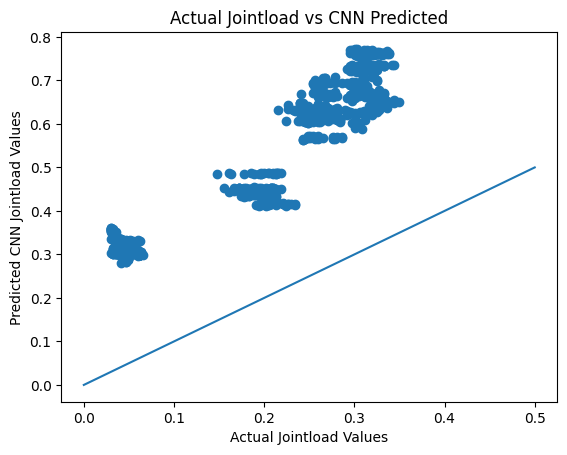

In [72]:
# Graph predicted vs actual
test_mags = get_magnitudes(test_result)
print(np.shape(test_mags))
cnn_predicted_mags = get_magnitudes(cnn_predictions)
print(np.shape(cnn_predictions))
plt.scatter(test_mags, cnn_predicted_mags)
plt.plot(np.linspace(0, .5, 100), np.linspace(0, .5, 100))
plt.title("Actual Jointload vs CNN Predicted")
plt.xlabel("Actual Jointload Values")
plt.ylabel("Predicted CNN Jointload Values")

In [73]:
def get_individual_distances(original, predicted):
    if len(original) != len(predicted):
        return -1
    retVal = np.zeros(len(original[0]))
    for i, j in zip(original, predicted):
        for n in range(len(original[0])):
            retVal[n] += i[n] - j[n]
    for n in range(len(retVal)):
        retVal[n] /= len(original)
    return retVal

Text(0, 0.5, 'Predicted Jointload Values')

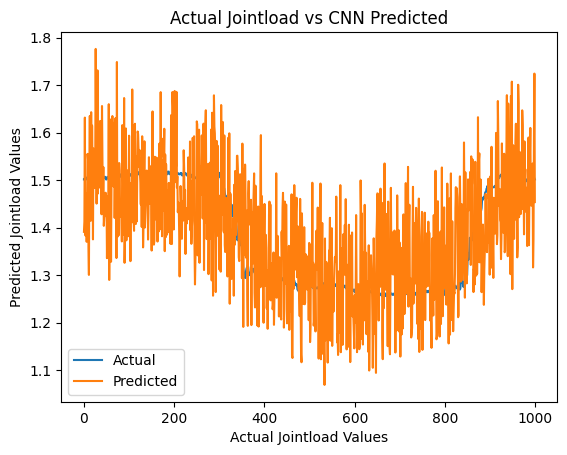

In [167]:
values = 800
plt.plot(np.arange(0, 1000), test_result[values], label = 'Actual')
plt.plot(np.arange(0, 1000), cnn_predictions[values], label = 'Predicted')
plt.legend()
plt.title("Actual Jointload vs CNN Predicted")
plt.xlabel("Actual Jointload Values")
plt.ylabel("Predicted Jointload Values")

In [168]:
cnn.save("./cnn.keras")

## LSTM

In [75]:
lstm = Sequential([
    Input((1000, 2)),
    LSTM(128, return_sequences=True),
    LSTM(64, return_sequences = True),
    Flatten(),
    Dense(50),
    Dense(300),
    Dense(1000)
])
# tf.keras.losses.Huber(delta=1.0) Adam(learning_rate=0.0001)

lstm.compile(optimizer="adam", loss='mse')
lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1000, 128)      │        67,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1000, 64)       │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │     3,200,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1000)           │       301,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,632,830 (13.86 MB)

 Trainable params: 3,632,830 (13.86 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
lstm.fit(train_data, train_result, epochs=10, batch_size=10, validation_split=0.3)

# lstm_loss, lstm_mae = lstm.evaluate(combined_interpolated_data, results)
# print(f"Loss: {lstm_loss}, MAE: {lstm_mae}")

# Predict using the model
lstm_predictions = lstm.predict(test_data)
# print("Predictions:", lstm_predictions)

Epoch 1/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 57s 266ms/step - loss: 1.3020 - val_loss: 0.0086
Epoch 2/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 54s 260ms/step - loss: 0.0103 - val_loss: 0.0076
Epoch 3/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 55s 263ms/step - loss: 0.0088 - val_loss: 0.0073
Epoch 4/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 55s 261ms/step - loss: 0.0072 - val_loss: 0.0052
Epoch 5/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 56s 267ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 6/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 61s 294ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 7/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 59s 285ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 8/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 60s 289ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 9/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 59s 283ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 10/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 59s 281ms/step - loss: 0.0020 - val_loss: 0.0027
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step


(994,)
(994, 1000)


Text(0, 0.5, 'Predicted Jointload Values')

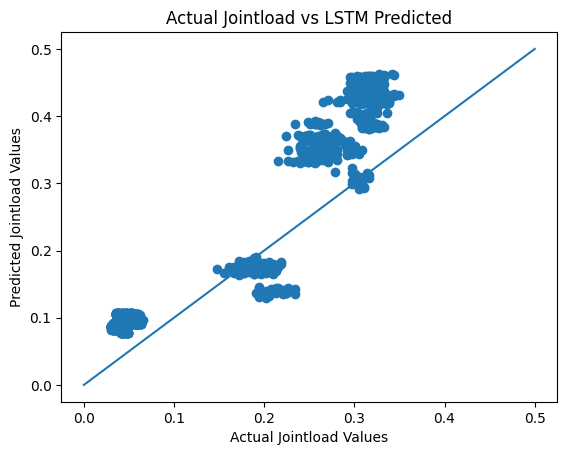

In [77]:
# Graph predicted vs actual
test_mags = get_magnitudes(test_result)
print(np.shape(test_mags))
lstm_predicted_mags = get_magnitudes(lstm_predictions)
print(np.shape(lstm_predictions))
plt.scatter(test_mags, lstm_predicted_mags)
plt.plot(np.linspace(0, .5, 100), np.linspace(0, .5, 100))
plt.title("Actual Jointload vs LSTM Predicted")
plt.xlabel("Actual Jointload Values")
plt.ylabel("Predicted Jointload Values")

In [169]:
mae = MeanAbsoluteError()
print("MAE: " + str(mae(test_result, lstm_predictions).numpy()))
mse = MeanSquaredError()
print("MSE: " + str(mse(test_result, lstm_predictions).numpy()))

MAE: 0.041959703


MSE: 0.002732389


Text(0, 0.5, 'Predicted Jointload Values')

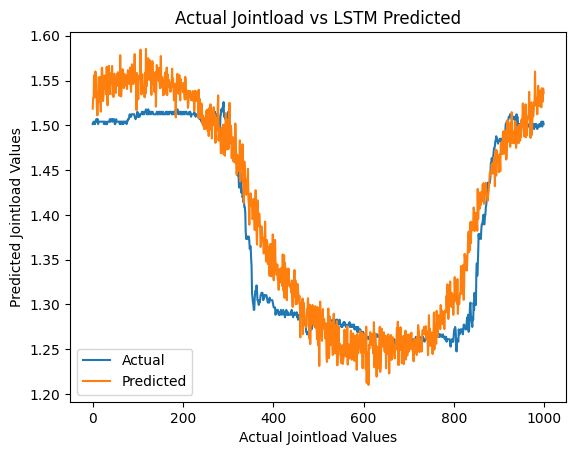

In [171]:
values = 800
plt.plot(np.arange(0, 1000), test_result[values], label = 'Actual')
plt.plot(np.arange(0, 1000), lstm_predictions[values], label = 'Predicted')
plt.legend()
plt.title("Actual Jointload vs LSTM Predicted")
plt.xlabel("Actual Jointload Values")
plt.ylabel("Predicted Jointload Values")

In [172]:
lstm.save("./lstm.keras")

## Standardized CNN

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
# Create normalized data

scaler = StandardScaler()
standardized_foot_data = scaler.fit_transform(stacked_raw_data)
angle_scaler = StandardScaler()
standardized_angle_data = angle_scaler.fit_transform(angle_data)

In [81]:
#Interpolate the angle data to be 1000 samples
interpolated_standardized_angle_data = [np.interp(np.linspace(0, 1, 1000), np.linspace(0, 1, 30), i) for i in standardized_angle_data]

combined_standardized_interpolated_data = np.stack((standardized_foot_data, interpolated_standardized_angle_data), -1)
print(np.shape(combined_standardized_interpolated_data))

(3975, 1000, 2)


In [82]:
#split data
standardized_train_size = int(len(combined_standardized_interpolated_data) * .7)
#Shuffle data since it's sorted
standardized_train_data, standardized_test_data, standardized_train_result, standardized_test_result = train_test_split(combined_standardized_interpolated_data, results_series)
print(len(standardized_train_data))
print(len(standardized_train_data[0]))
print(len(standardized_train_data[0][0]))

2981
1000
2


In [180]:
standardized_cnn = Sequential([
    Input((1000, 2)),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size = 2),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size = 2),
    # Conv1D(128, kernel_size=3),
    # MaxPooling1D(pool_size = 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1000, activation='linear'),
])
# Adam(learning_rate=0.0001)  tf.keras.losses.Huber(delta=1.0)
standardized_cnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

standardized_cnn.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_15 (Conv1D)              │ (None, 998, 64)        │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 499, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 497, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 248, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 31744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │     2,031,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1000)           │       129,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,194,152 (8.37 MB)

 Trainable params: 2,194,152 (8.37 MB)

 Non-trainable params: 0 (0.00 B)

In [181]:
standardized_cnn.fit(standardized_train_data, standardized_train_result, epochs=50, batch_size=5, validation_split=0.2)

# standardized_cnn_loss, standardized_cnn_mae = standardized_cnn.evaluate(combined_standardized_interpolated_data, results)
# print(f"Loss: {cnn_loss}, MAE: {cnn_mae}")

# Predict using the model
standardized_cnn_predictions = standardized_cnn.predict(standardized_test_data)
# print("Predictions:", standardized_cnn_predictions)

Epoch 1/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.1780 - mae: 0.2283 - val_loss: 0.0126 - val_mae: 0.0931
Epoch 2/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0053 - mae: 0.0550 - val_loss: 0.0016 - val_mae: 0.0311
Epoch 3/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0023 - mae: 0.0359 - val_loss: 0.0020 - val_mae: 0.0372
Epoch 4/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0021 - mae: 0.0353 - val_loss: 0.0023 - val_mae: 0.0409
Epoch 5/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0018 - mae: 0.0333 - val_loss: 0.0013 - val_mae: 0.0300
Epoch 6/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0017 - mae: 0.0317 - val_loss: 7.6147e-04 - val_mae: 0.0219
Epoch 7/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0011 - mae: 0.0254 - val_loss: 8.0153e-04 - val_mae: 0.0231
Epoch 8/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0013 - mae: 0.0277 - val_loss: 8.7411e-04 - val_mae: 0.0231
Epoch 9/50
477/477 ━━━━━━━━━━━━━━━━━

(994,)
(994, 1000)


Text(0, 0.5, 'Predicted Jointload Values')

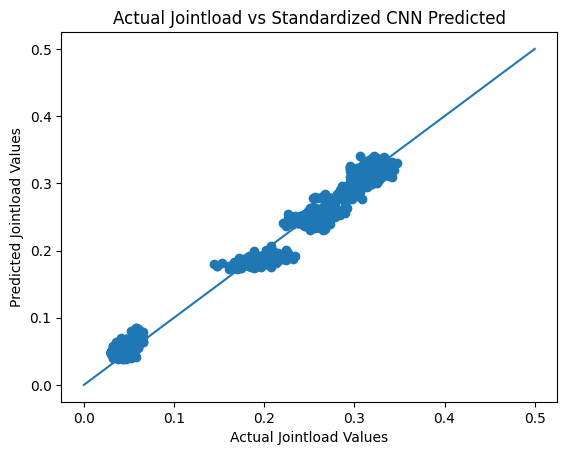

In [182]:
# Graph predicted vs actual
test_mags = get_magnitudes(standardized_test_result)
print(np.shape(test_mags))
standardized_cnn_predicted_mags = get_magnitudes(standardized_cnn_predictions)
print(np.shape(standardized_cnn_predictions))
plt.scatter(test_mags, standardized_cnn_predicted_mags)
plt.plot(np.linspace(0, .5, 100), np.linspace(0, .5, 100))
plt.title("Actual Jointload vs Standardized CNN Predicted")
plt.xlabel("Actual Jointload Values")
plt.ylabel("Predicted Jointload Values")

In [185]:
mae = MeanAbsoluteError()
print("MAE: " + str(mae(standardized_test_result, standardized_cnn_predictions).numpy()))
mse = MeanSquaredError()
print("MSE: " + str(mse(standardized_test_result, standardized_cnn_predictions).numpy()))

MAE: 0.010171413
MSE: 0.00016545747


Text(0, 0.5, 'Predicted Jointload Values')

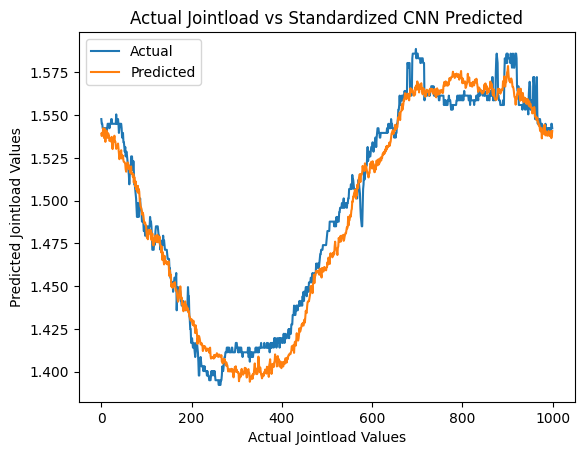

In [198]:
values = 50
plt.plot(np.arange(0, 1000), standardized_test_result[values], label = 'Actual')
plt.plot(np.arange(0, 1000), standardized_cnn_predictions[values], label = "Predicted")
plt.legend()
plt.title("Actual Jointload vs Standardized CNN Predicted")
plt.xlabel("Actual Jointload Values")
plt.ylabel("Predicted Jointload Values")

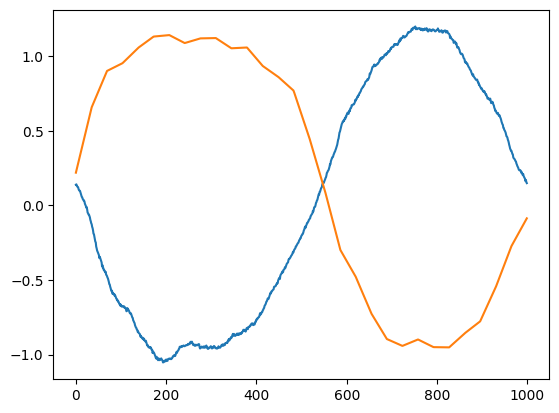

In [200]:
plt.plot(np.arange(0, 1000), standardized_test_data[values])

Text(0, 0.5, 'Average Difference')

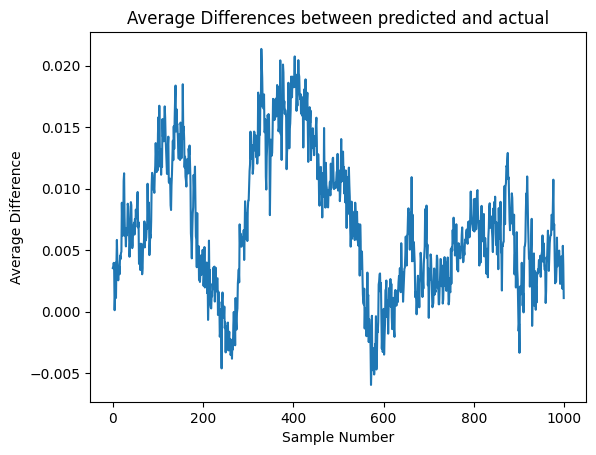

In [201]:
standardized_predicted_differences = get_individual_distances(standardized_test_result, standardized_cnn_predictions)
plt.plot(np.arange(0, 1000), standardized_predicted_differences)
plt.title("Average Differences between predicted and actual")
plt.xlabel("Sample Number")
plt.ylabel("Average Difference")

In [199]:
standardized_cnn.save("./standardized_cnn.keras")

## Standardized LSTM

In [215]:
standardized_lstm = Sequential([
    Input((1000, 2)),
    LSTM(64, return_sequences = True),
    LSTM(128, return_sequences=True),
    Flatten(),
    Dense(64),
    Dense(128),
    Dense(1000)
])

standardized_lstm.compile(optimizer='adam', loss='mse')
standardized_lstm.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 1000, 64)       │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 1000, 128)      │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 128000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │     8,192,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1000)           │       129,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,445,352 (32.22 MB)

 Trainable params: 8,445,352 (32.22 MB)

 Non-trainable params: 0 (0.00 B)

In [216]:
standardized_lstm.fit(standardized_train_data, standardized_train_result, epochs=10, batch_size=5, validation_split=0.3)

# lstm_loss, lstm_mae = lstm.evaluate(combined_interpolated_data, results)
# print(f"Loss: {lstm_loss}, MAE: {lstm_mae}")

# Predict using the model
standardized_lstm_predictions = standardized_lstm.predict(standardized_test_data)
# print("Predictions:", lstm_predictions)

Epoch 1/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 107s 252ms/step - loss: 0.3011 - val_loss: 0.0087
Epoch 2/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 108s 259ms/step - loss: 0.0075 - val_loss: 0.0015
Epoch 3/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 105s 252ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 4/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 105s 252ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 5/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 106s 253ms/step - loss: 0.0018 - val_loss: 0.0032
Epoch 6/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 106s 254ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 7/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 106s 253ms/step - loss: 0.0019 - val_loss: 9.6241e-04
Epoch 8/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 106s 254ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 9/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 106s 253ms/step - loss: 0.0016 - val_loss: 8.4591e-04
Epoch 10/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 104s 249ms/step - loss: 0.0023 - val_loss: 0.0045
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step


(994,)
(994, 1000)


Text(0, 0.5, 'Predicted Polynomial Jointload Values')

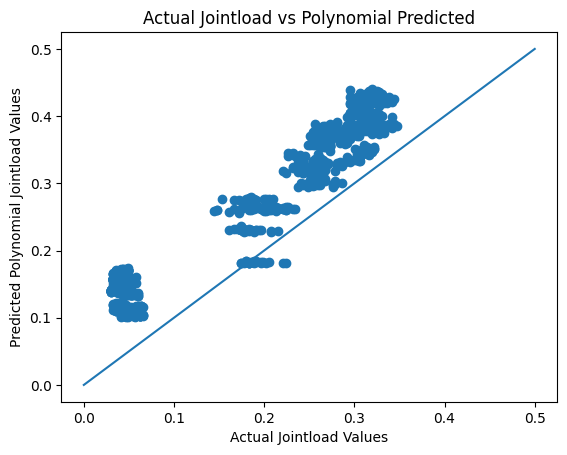

In [218]:
# Graph predicted vs actual
test_mags = get_magnitudes(standardized_test_result)
print(np.shape(test_mags))
standardized_lstm_predicted_mags = get_magnitudes(standardized_lstm_predictions)
print(np.shape(standardized_lstm_predictions))
plt.scatter(test_mags, standardized_lstm_predicted_mags)
plt.plot(np.linspace(0, .5, 100), np.linspace(0, .5, 100))
plt.title("Actual Jointload vs Polynomial Predicted")
plt.xlabel("Actual Jointload Values")
plt.ylabel("Predicted Polynomial Jointload Values")

In [219]:
mae = MeanAbsoluteError()
print("MAE: " + str(mae(standardized_test_result, standardized_lstm_predictions).numpy()))
mse = MeanSquaredError()
print("MSE: " + str(mse(standardized_test_result, standardized_lstm_predictions).numpy()))

MAE: 0.057232697
MSE: 0.004372314


Text(0, 0.5, 'Predicted Jointload Values')

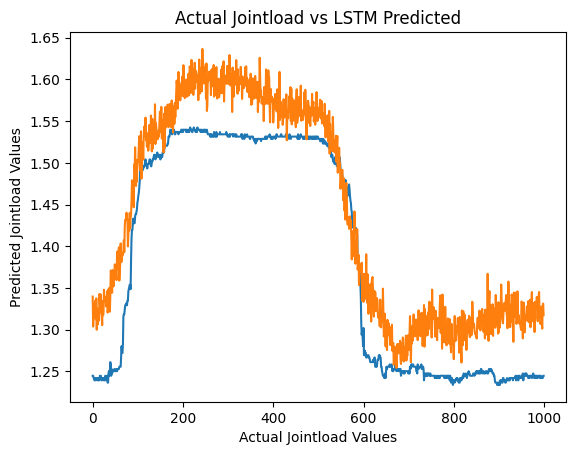

In [220]:
values = 700
plt.plot(np.arange(0, 1000), standardized_test_result[values], label = 'Actual')
plt.plot(np.arange(0, 1000), standardized_lstm_predictions[values], label = 'Predicted')
plt.title("Actual Jointload vs LSTM Predicted")
plt.xlabel("Actual Jointload Values")
plt.ylabel("Predicted Jointload Values")

Text(0, 0.5, 'Average Difference')

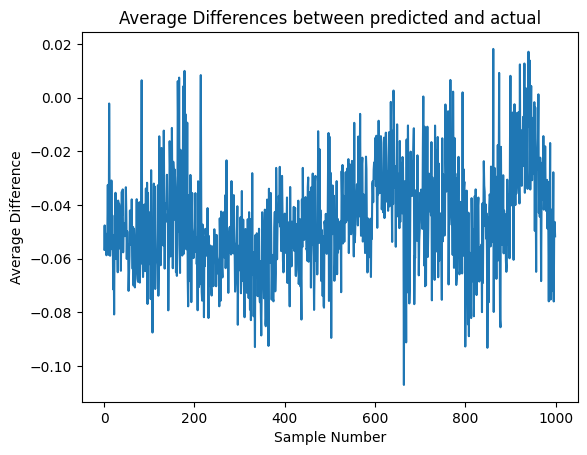

In [95]:
standardized_predicted_differences = get_individual_distances(standardized_test_result, standardized_lstm_predictions)
plt.plot(np.arange(0, 1000), standardized_predicted_differences)
plt.title("Average Differences between predicted and actual")
plt.xlabel("Sample Number")
plt.ylabel("Average Difference")

In [96]:
standardized_lstm.save("./standardized_lstm.keras")

## Smoothed Standardized CNN

In [97]:
stacked_raw_smooth_data = np.vstack((f1_foot_raw_smooth, f2_foot_raw_smooth, f3_foot_raw_smooth))
scaler = StandardScaler()
standardized_smooth_foot_data = scaler.fit_transform(stacked_raw_smooth_data)
angle_scaler = StandardScaler()
standardized_smooth_angle_data = angle_scaler.fit_transform(angle_data)

In [98]:
# Stack time series data

#Interpolate the angle data to be 1000 samples
interpolated_angle_data = [np.interp(np.linspace(0, 1, 1000), np.linspace(0, 1, 30), i) for i in standardized_smooth_angle_data]

combined_smooth_interpolated_data = np.stack((standardized_smooth_foot_data, interpolated_angle_data), -1)
print(np.shape(combined_smooth_interpolated_data))

results_series = np.vstack((f1_jointload_raw_clean, f2_jointload_raw_clean, f3_jointload_raw_clean))
results_smooth_series = np.vstack((f1_jointload_raw_smooth, f2_jointload_raw_smooth, f3_jointload_raw_smooth))
print(np.shape(results_series))

(3975, 1000, 2)
(3975, 1000)


In [129]:
#split data
train_size = int(len(combined_interpolated_data) * .7)
#Shuffle data since it's sorted
train_smooth_data1, test_smooth_data1, train_smooth_result1, test_smooth_result1 = train_test_split(combined_smooth_interpolated_data, results_series)
train_smooth_data2, test_smooth_data2, train_smooth_result2, test_smooth_result2 = train_test_split(combined_standardized_interpolated_data, results_smooth_series)
print(len(train_data))
print(len(train_data[0]))
print(len(train_data[0][0]))

2981
1000
2


### Train a CNN with only smoothing the input data

In [100]:
cnn_smooth1 = Sequential([
    Input((1000, 2)),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size = 2),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size = 2),
    # Conv1D(128, kernel_size=3),
    # MaxPooling1D(pool_size = 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1000, activation='linear'),
])
# tf.keras.losses.Huber(delta=1.0)
# Adam(learning_rate=0.0001)
cnn_smooth1.compile(optimizer='adam', loss ='mse', metrics=['mae'])

cnn_smooth1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 998, 64)        │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 499, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 497, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 248, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 31744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │     2,031,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1000)           │       129,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,194,152 (8.37 MB)

 Trainable params: 2,194,152 (8.37 MB)

 Non-trainable params: 0 (0.00 B)

In [101]:
cnn_smooth1.fit(train_smooth_data1, train_smooth_result1, epochs=50, batch_size=5, validation_split=0.3)

# cnn_loss, cnn_mae = cnn.evaluate(combined_interpolated_data, results)
# print(f"Loss: {cnn_loss}, MAE: {cnn_mae}")

# Predict using the model
cnn_smooth_predictions1 = cnn_smooth1.predict(test_smooth_data1)
# print("Predictions:", cnn_smooth_predictions1)

Epoch 1/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.2037 - mae: 0.2462 - val_loss: 0.0128 - val_mae: 0.1007
Epoch 2/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0039 - mae: 0.0495 - val_loss: 0.0016 - val_mae: 0.0310
Epoch 3/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0025 - mae: 0.0389 - val_loss: 0.0029 - val_mae: 0.0433
Epoch 4/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0030 - mae: 0.0412 - val_loss: 0.0014 - val_mae: 0.0298
Epoch 5/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0012 - mae: 0.0259 - val_loss: 0.0012 - val_mae: 0.0265
Epoch 6/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0024 - mae: 0.0356 - val_loss: 0.0011 - val_mae: 0.0278
Epoch 7/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0013 - mae: 0.0276 - val_loss: 0.0011 - val_mae: 0.0261
Epoch 8/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0012 - mae: 0.0267 - val_loss: 0.0021 - val_mae: 0.0386
Epoch 9/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - l

(994,)
(994, 1000)


Text(0, 0.5, 'Predicted Jointload Values')

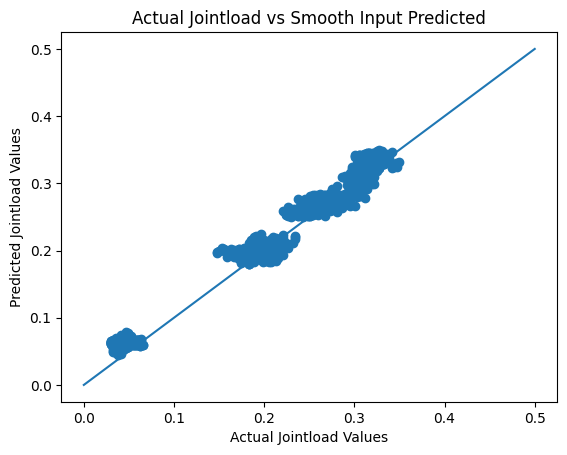

In [102]:
# Graph predicted vs actual
test_mags = get_magnitudes(test_smooth_result1)
print(np.shape(test_mags))
cnn_predicted_mags = get_magnitudes(cnn_smooth_predictions1)
print(np.shape(cnn_predictions))
plt.scatter(test_mags, cnn_predicted_mags)
plt.plot(np.linspace(0, .5, 100), np.linspace(0, .5, 100))
plt.title("Actual Jointload vs Smooth Input Predicted")
plt.xlabel("Actual Jointload Values")
plt.ylabel("Predicted Jointload Values")

In [221]:
mae = MeanAbsoluteError()
print("MAE: " + str(mae(test_smooth_result1, cnn_smooth_predictions1).numpy()))
mse = MeanSquaredError()
print("MSE: " + str(mse(test_smooth_result1, cnn_smooth_predictions1).numpy()))

MAE: 0.10812905
MSE: 0.02270393


Text(0, 0.5, 'Predicted Jointload Values')

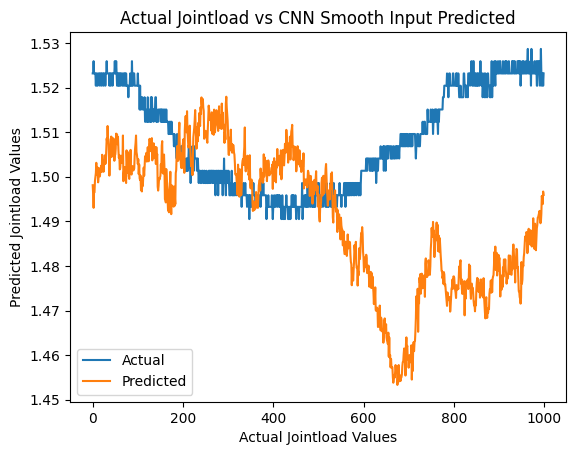

: 

In [225]:
values = 500
plt.plot(np.arange(0, 1000), test_smooth_result1[values], label = "Actual")
plt.plot(np.arange(0, 1000), cnn_smooth_predictions1[values], label = "Predicted")
plt.legend()
plt.title("Actual Jointload vs CNN Smooth Input Predicted")
plt.xlabel("Actual Jointload Values")
plt.ylabel("Predicted Jointload Values")

Text(0, 0.5, 'Average Difference')

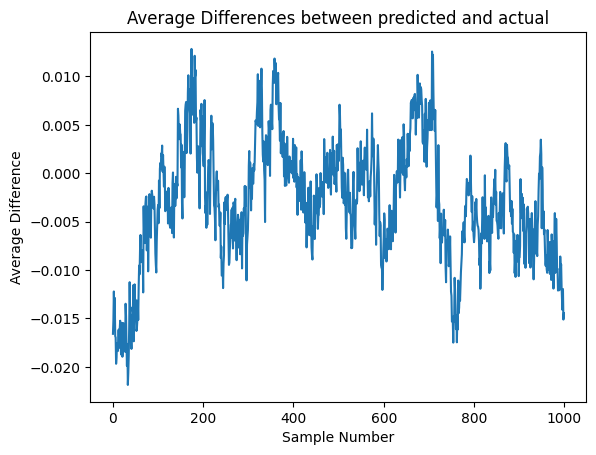

In [104]:
smooth_predicted_differences1 = get_individual_distances(test_smooth_result1, cnn_smooth_predictions1)
plt.plot(np.arange(0, 1000), smooth_predicted_differences1)
plt.title("Average Differences between predicted and actual")
plt.xlabel("Sample Number")
plt.ylabel("Average Difference")

In [ ]:
cnn_smooth1.save("./cnn_smooth_input.keras")

### With Smooth Results as well
This is just to see if we can get more consistent smooth data then it will work better

In [130]:
cnn_smooth2 = Sequential([
    Input((1000, 2)),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size = 2),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size = 2),
    # Conv1D(128, kernel_size=3),
    # MaxPooling1D(pool_size = 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1000, activation='linear'),
])
# tf.keras.losses.Huber(delta=1.0)
# Adam(learning_rate=0.0001)
cnn_smooth2.compile(optimizer='adam', loss ='mse', metrics=['mae'])

cnn_smooth2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)              │ (None, 998, 64)        │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 499, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 497, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 248, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 31744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │     2,031,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1000)           │       129,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,194,152 (8.37 MB)

 Trainable params: 2,194,152 (8.37 MB)

 Non-trainable params: 0 (0.00 B)

In [131]:
cnn_smooth2.fit(train_smooth_data2, train_smooth_result2, epochs=50, batch_size=5, validation_split=0.3)

# cnn_loss, cnn_mae = cnn.evaluate(combined_interpolated_data, results)
# print(f"Loss: {cnn_loss}, MAE: {cnn_mae}")

# Predict using the model
cnn_smooth_predictions2 = cnn_smooth2.predict(test_smooth_data2)
# print("Predictions:", cnn_smooth_predictions1)

Epoch 1/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.2074 - mae: 0.2528 - val_loss: 0.0029 - val_mae: 0.0435
Epoch 2/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0042 - mae: 0.0510 - val_loss: 0.0035 - val_mae: 0.0494
Epoch 3/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0027 - mae: 0.0402 - val_loss: 0.0014 - val_mae: 0.0296
Epoch 4/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0016 - mae: 0.0317 - val_loss: 0.0015 - val_mae: 0.0310
Epoch 5/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0016 - mae: 0.0302 - val_loss: 0.0020 - val_mae: 0.0391
Epoch 6/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0018 - mae: 0.0324 - val_loss: 6.9680e-04 - val_mae: 0.0202
Epoch 7/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0012 - mae: 0.0273 - val_loss: 0.0012 - val_mae: 0.0292
Epoch 8/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0010 - mae: 0.0247 - val_loss: 0.0019 - val_mae: 0.0349
Epoch 9/50
418/418 ━━━━━━━━━━━━━━━━━━━━ 5s 1

(994,)
(994, 1000)


Text(0, 0.5, 'Predicted Polynomial Jointload Values')

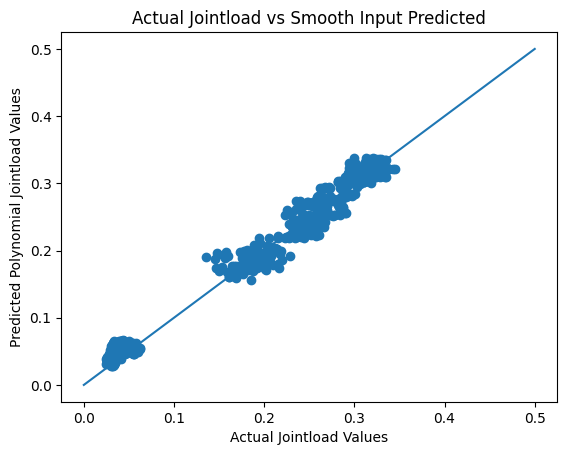

In [132]:
# Graph predicted vs actual
test_mags = get_magnitudes(test_smooth_result2)
print(np.shape(test_mags))
cnn_predicted_mags = get_magnitudes(cnn_smooth_predictions2)
print(np.shape(cnn_predictions))
plt.scatter(test_mags, cnn_predicted_mags)
plt.plot(np.linspace(0, .5, 100), np.linspace(0, .5, 100))
plt.title("Actual Jointload vs Smooth Input Predicted")
plt.xlabel("Actual Jointload Values")
plt.ylabel("Predicted Polynomial Jointload Values")

In [ ]:
mae = MeanAbsoluteError()
print("MAE: " + str(mae(test_smooth_result2, cnn_smooth_predictions2).numpy()))
mse = MeanSquaredError()
print("MSE: " + str(mse(test_smooth_result2, cnn_smooth_predictions2).numpy()))

Text(0, 0.5, 'Predicted Jointload Values')

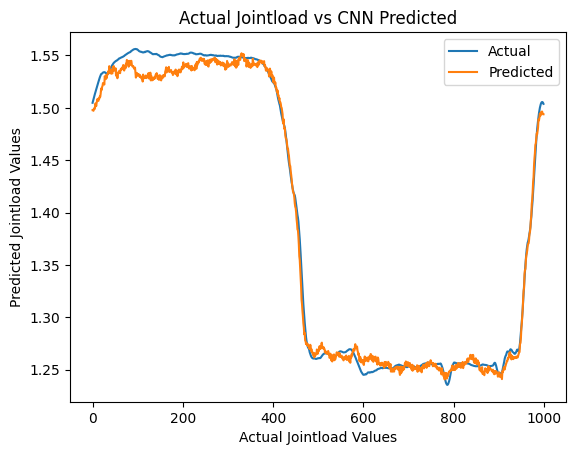

In [133]:
values = 250
plt.plot(np.arange(0, 1000), test_smooth_result2[values], label = 'Actual')
plt.plot(np.arange(0, 1000), cnn_smooth_predictions2[values], label = 'Predicted')
plt.legend()
plt.title("Actual Jointload vs CNN Predicted")
plt.xlabel("Actual Jointload Values")
plt.ylabel("Predicted Jointload Values")

Text(0, 0.5, 'Average Difference')

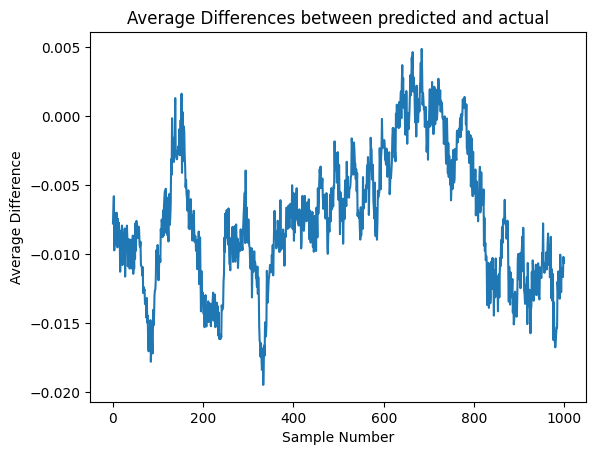

In [136]:
smooth_predicted_differences2 = get_individual_distances(test_smooth_result2, cnn_smooth_predictions2)
plt.plot(np.arange(0, 1000), smooth_predicted_differences2)
plt.title("Average Differences between predicted and actual")
plt.xlabel("Sample Number")
plt.ylabel("Average Difference")

In [ ]:
cnn_smooth2.save("./cnn_smooth_output.keras")

## CNN With Less Data

This is just to see how well the model performs without some of the data since the three experiments are very different in their data.

In [110]:
# stacked_less_data = np.vstack((f1_foot_raw_clean, f2_foot_raw_clean, f3_foot_raw_clean))
stacked_less_data = np.vstack((f1_foot_raw_clean, f2_foot_raw_clean))

scaler = StandardScaler()
standardized_less_foot_data = scaler.fit_transform(stacked_less_data)

angle_scaler = StandardScaler()
# stacked_less_angle = np.vstack((f1_angle_crop, f2_angle_crop, f3_angle_crop))
stacked_less_angle = np.vstack((f1_angle_crop, f2_angle_crop))

standardized_less_angle_data = angle_scaler.fit_transform(stacked_less_angle)

# Stack time series data

#Interpolate the angle data to be 1000 samples
interpolated_less_angle_data = [np.interp(np.linspace(0, 1, 1000), np.linspace(0, 1, 30), i) for i in standardized_less_angle_data]

combined_less_interpolated_data = np.stack((standardized_less_foot_data, interpolated_less_angle_data), -1)
print(np.shape(combined_less_interpolated_data))

# results_less_series = np.vstack((f1_jointload_raw_clean, f2_jointload_raw_clean, f3_jointload_raw_clean))
results_less_series = np.vstack((f1_jointload_raw_clean, f2_jointload_raw_clean))

print(np.shape(results_less_series))

#split data
train_size = int(len(stacked_less_data) * .7)
#Shuffle data since it's sorted
train_less_data, test_less_data, train_less_result, test_less_result = train_test_split(combined_less_interpolated_data, results_less_series)
print(len(train_less_data))

(2246, 1000, 2)
(2246, 1000)
1684


In [111]:
cnn_less = Sequential([
    Input((1000, 2)),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size = 2),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size = 2),
    # Conv1D(128, kernel_size=3),
    # MaxPooling1D(pool_size = 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1000, activation='linear'),
])
# tf.keras.losses.Huber(delta=1.0)
# Adam(learning_rate=0.0001)
cnn_less.compile(optimizer='adam', loss ='mse', metrics=['mae'])

cnn_less.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)               │ (None, 998, 64)        │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 499, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 497, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 248, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 31744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │     2,031,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1000)           │       129,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,194,152 (8.37 MB)

 Trainable params: 2,194,152 (8.37 MB)

 Non-trainable params: 0 (0.00 B)

In [112]:
cnn_less.fit(train_less_data, train_less_result, epochs=50, batch_size=5, validation_split=0.3)

# cnn_loss, cnn_mae = cnn.evaluate(combined_interpolated_data, results)
# print(f"Loss: {cnn_loss}, MAE: {cnn_mae}")

# Predict using the model
cnn_less_predictions = cnn_less.predict(test_less_data)
# print("Predictions:", cnn_smooth_predictions1)

Epoch 1/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.4164 - mae: 0.4136 - val_loss: 0.0025 - val_mae: 0.0400
Epoch 2/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0028 - mae: 0.0402 - val_loss: 0.0022 - val_mae: 0.0391
Epoch 3/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0025 - mae: 0.0383 - val_loss: 0.0032 - val_mae: 0.0465
Epoch 4/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0020 - mae: 0.0343 - val_loss: 0.0015 - val_mae: 0.0292
Epoch 5/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0018 - mae: 0.0317 - val_loss: 8.7782e-04 - val_mae: 0.0228
Epoch 6/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0011 - mae: 0.0244 - val_loss: 0.0083 - val_mae: 0.0769
Epoch 7/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0027 - mae: 0.0391 - val_loss: 5.9649e-04 - val_mae: 0.0196
Epoch 8/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 9.9087e-04 - mae: 0.0244 - val_loss: 4.9198e-04 - val_mae: 0.0173
Epoch 9/50
236/236 ━━━━━━━━━━━━━

(562,)
(994, 1000)


Text(0, 0.5, 'Predicted Polynomial Jointload Values')

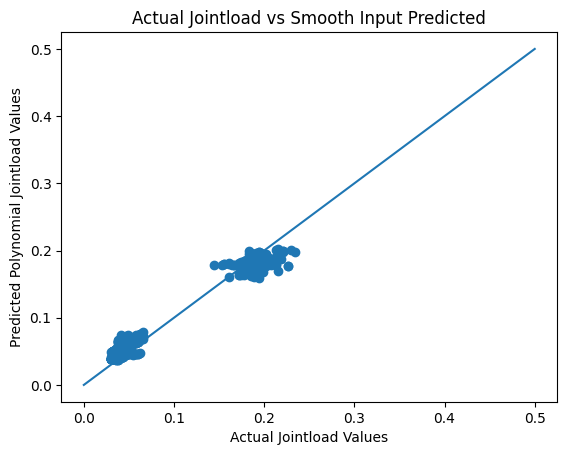

In [113]:
# Graph predicted vs actual
test_mags = get_magnitudes(test_less_result)
print(np.shape(test_mags))
cnn_predicted_mags = get_magnitudes(cnn_less_predictions)
print(np.shape(cnn_predictions))
plt.scatter(test_mags, cnn_predicted_mags)
plt.plot(np.linspace(0, .5, 100), np.linspace(0, .5, 100))
plt.title("Actual Jointload vs Smooth Input Predicted")
plt.xlabel("Actual Jointload Values")
plt.ylabel("Predicted Polynomial Jointload Values")

In [ ]:
mae = MeanAbsoluteError()
print("MAE: " + str(mae(test_less_result, cnn_less_predictions).numpy()))
mse = MeanSquaredError()
print("MSE: " + str(mse(test_less_result, cnn_less_predictions).numpy()))

Text(0, 0.5, 'Predicted Jointload Values')

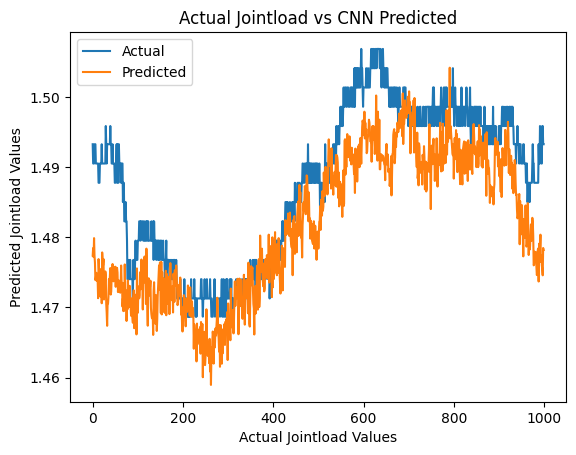

In [114]:
values = 29
plt.plot(np.arange(0, 1000), test_less_result[values], label = "Actual")
plt.plot(np.arange(0, 1000), cnn_less_predictions[values], label = "Predicted")
plt.legend()
plt.title("Actual Jointload vs CNN Predicted")
plt.xlabel("Actual Jointload Values")
plt.ylabel("Predicted Jointload Values")

Text(0, 0.5, 'Average Difference')

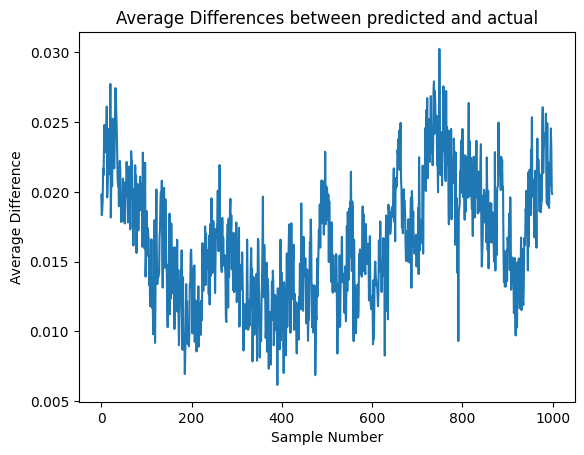

In [115]:
less_predicted_differences = get_individual_distances(test_less_result, cnn_less_predictions)
plt.plot(np.arange(0, 1000), less_predicted_differences)
plt.title("Average Differences between predicted and actual")
plt.xlabel("Sample Number")
plt.ylabel("Average Difference")

In [ ]:
cnn_less.save("./cnn_less_nof3.keras")